# Capture traces for 16.11

#### Try-out

In [ ]:
!pip install ipython ipympl ipywidgets -Uq
!pip install --upgrade ipython -Uq

In [1]:
import matplotlib.pylab as plt

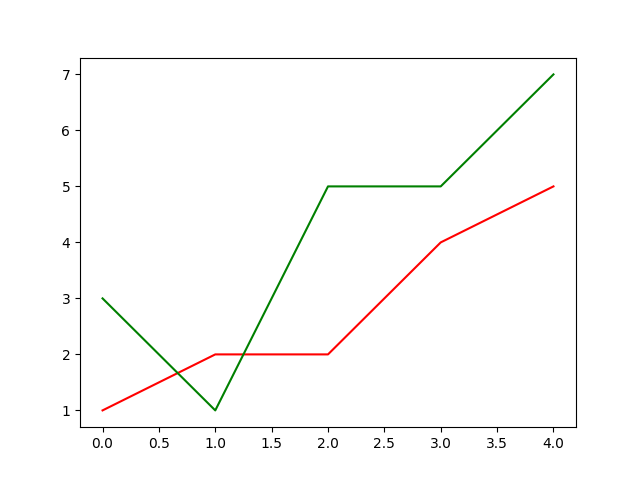

In [2]:
%matplotlib ipympl
import matplotlib.pylab as plt
    
plt.plot([1,2,2,4,5], 'r')
plt.plot([3,1,5,5,7], 'g')
plt.show()

#### Agreates

In [1]:
import matplotlib.pyplot as plt

In [2]:
%run "./File_Uploader.ipynb"


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Samuel\AppData\Local\Temp\ipykernel_14928\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [3]:
%run "./ANN_Observer.ipynb"

✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.


In [4]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


## Capture Traces

In [38]:
cw_setuper._scope_disc_()
scope : cw.scope = None
target: cw.target = None

(ChipWhisperer Scope ERROR|File naeusbchip.py:108) Scope already disconnected!


✔️ Scope disconnected.
✔️ Firmware disconnected.


In [39]:
make_dir = "makefile_dir_basic_MLP"
re_init_config = {"MAKEDIR" : f'./{make_dir}/'}
cw_setuper = CW_Setuper(firmware_reinit = True, re_init_dict  = re_init_config)
scope = cw_setuper.scope
target = cw_setuper.target

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_MLP/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 15963 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 15963 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/5000 [00:00<?, ?it/s]

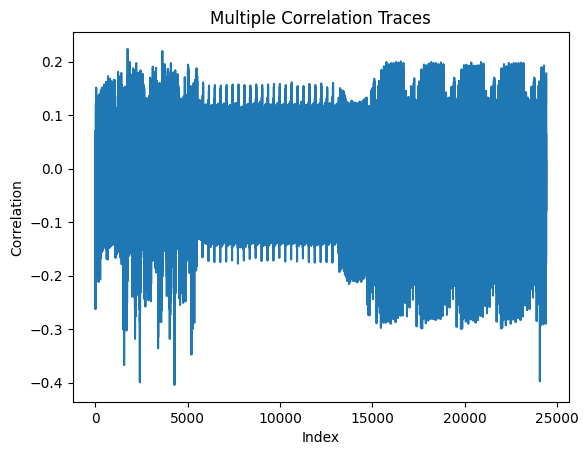

✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
✔️ Scope disconnected.
✔️ Firmware disconnected.
CWbytearray(b'00 72 16 0a 00 00 00 00 00 00 00 14 00 00 00 00 00 00 00 05 00 00 00 5f 00 c8 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

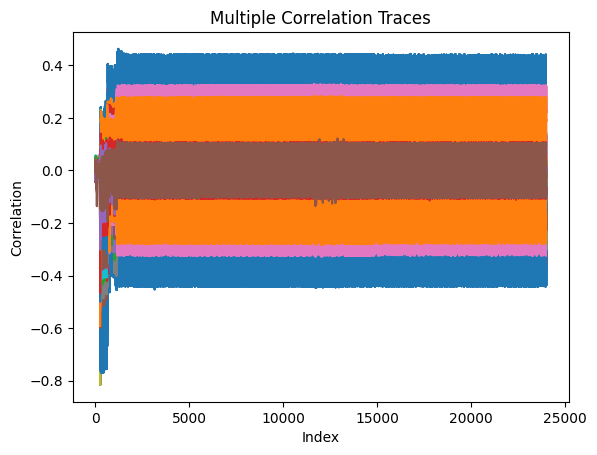

In [40]:
#epochs_list = [800, 1200, 1400]
epochs_list = [5000]
#epochs_list = [1500, 2000, 2500]
ncorr_all = None
decimate = 1
reverse = False
scope = cw_setuper.scope
target = cw_setuper.target
for i in trange(len(epochs_list), desc='Capturing and Analysing the traces:'):
    epochs = epochs_list[i]
    #cmd = 'o'
    #name = f"_OneTimeMult_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
    cmd = 'p'
    name = f"_722_BasicMLP_Dec{decimate}-ntg{decimate}-{epochs}" #ntg no-target-reset
 
    scope_setup(samples=24429, decimate=decimate)    
    traces, rand_inputs = measure_traces(cmd=cmd)
    waves = []
    out_data = []
    for i in traces:
        waves.append(i[0])
        out_data.append(i[2])
    plot_mult(np.array(waves[0]), _type = name, mult=False)
    files = save_data(waves, rand_inputs, out_data[0], path="E:/DP_database/database", name_extended = name)
    #upload_file_to_gdrive(files,  dir_path = "E:/DP_database/database/")
    if len(epochs_list) == 1:
        cw_setuper._scope_disc_()
        scope : cw.scope = None
        target: cw.target = None
    #Analysis
    print(out_data[0])
    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 24000, ith_weight = 0, calc_p_value=False)

    np.save(f"E:/DP_database/database/corrs_{name}.npy", np.array(ncorr_all))
    plot_mult(np.array(ncorr_all)[:,:], _type = "tmp")
    """
    secret_weight = []
    index = 0
    for i in out_data[0][3:out_data[0][2]+2]:
        secret_weight.append(i)

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex = get_weight(np.array(ncorr_all), show_info=False, nextIndex = index)
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")

        figure.savefig(f'{name}_correlation.png')

        cw.plot(colmn_maxVector) * cw.plot(ncorr_all[secret_value]) * cw.plot(ncorr_all[secret])
        plt.show()
    """

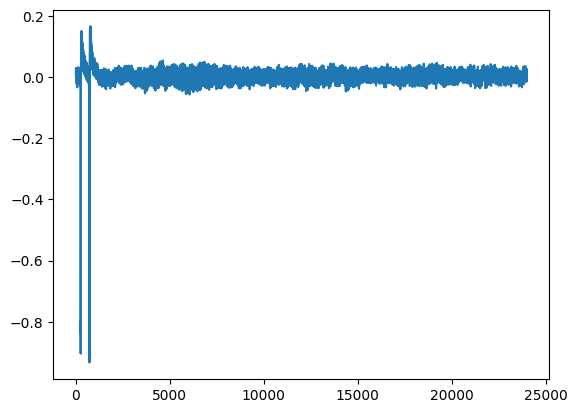

In [15]:
plt.plot(ncorr_all[1])

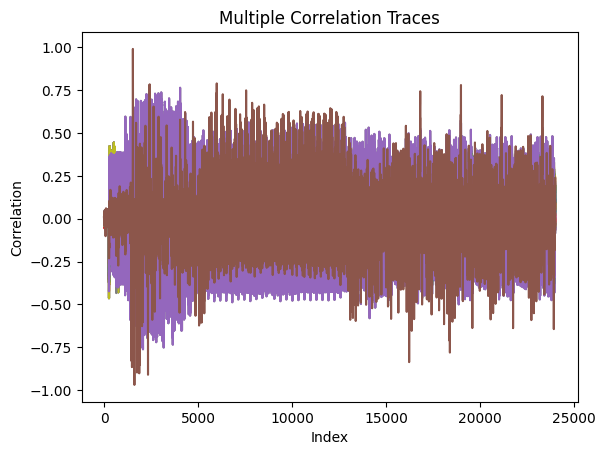

In [17]:
plot_mult(np.array(ncorr_all), _type = "tmp")

In [34]:
cw_setuper._scope_disc_()
scope : cw.scope = None
target: cw.target = None

(ChipWhisperer Scope ERROR|File naeusbchip.py:108) Scope already disconnected!


✔️ Scope disconnected.
✔️ Firmware disconnected.


In [31]:
for i in np.array(out_data)[0,2:-4]:
   print(int(i)) 

22
255
77
76
52
20
228
240
0
116
115
205
58
51
240
254
0
5
0
0
0


CWbytearray(b'00 72 16 ff 4d 4c 34 14 e4 f0 00 74 73 cd 3a 33 f0 fe 00 05 00 00 00 6b 00 d2 00')


Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

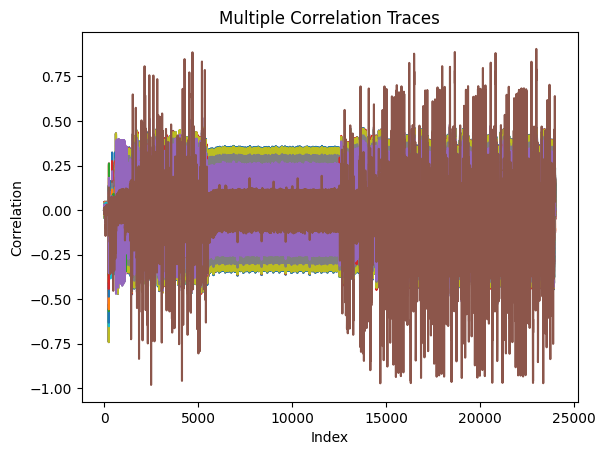

In [30]:
    print(out_data[0])
    ith_weight = 0
    start = ith_weight*epochs
    ncorr_all = V2_ANN_CPA_OTS(rand_inputs, np.array(waves)[start:start+epochs,:], n_traces = epochs, trace_len = 24000, ith_weight = 0, calc_p_value=False)

    np.save(f"E:/DP_database/database/corrs_{name}.npy", np.array(ncorr_all))
    plot_mult(np.array(ncorr_all)[:,:], _type = "tmp")

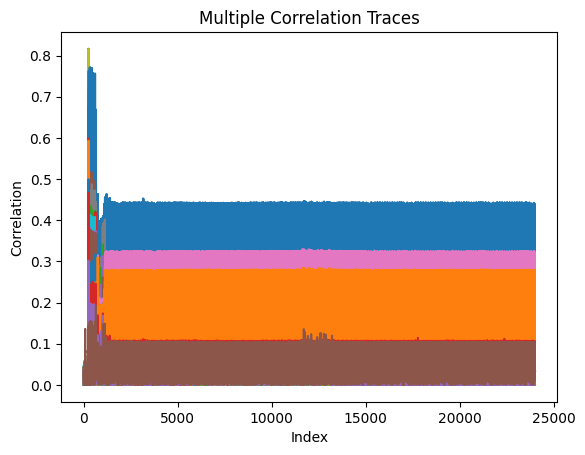

In [43]:
plot_mult(abs(np.array(ncorr_all)[:,:]), _type = "tmp")

In [7]:
import pandas as pd
waves = np.load("E:/DP_database/database/waves__722_BasicMLP_Dec1-ntg1-5000.npy")
weights = np.load("E:/DP_database/database/weights__722_BasicMLP_Dec1-ntg1-5000.csv.npy")
rand_input = pd.read_csv("E:/DP_database/database/rand_inputs__722_BasicMLP_Dec1-ntg1-5000.csv")
rand_input = rand_input.iloc[:,1].fillna(0)
rand_input = rand_input.to_numpy()
ncorr_all = np.load("E:/DP_database/database/corrs__722_BasicMLP_Dec1-ntg1-5000.npy")

In [10]:
weights

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

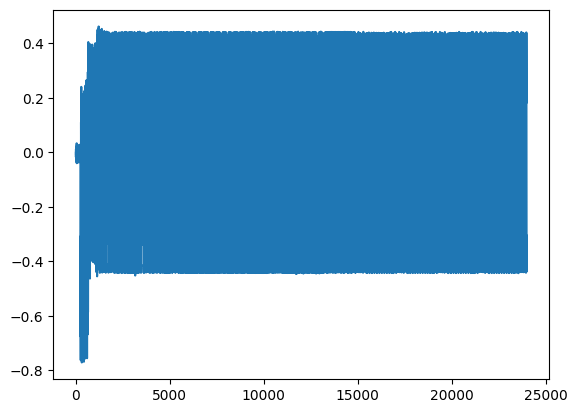

In [46]:
plt.plot(ncorr_all[20])

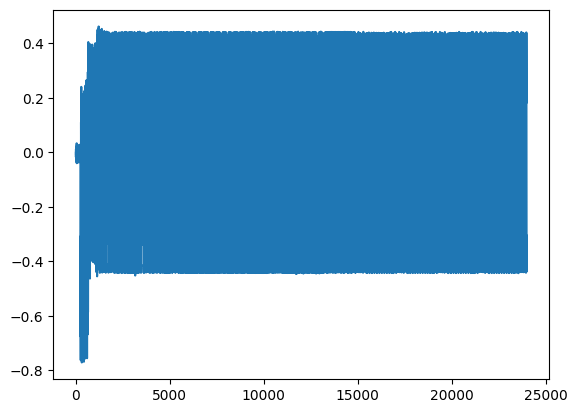

In [45]:
plt.plot(ncorr_all[10])

24000
 Index of global max: 249 and global_max_val: 0.8162345949846169


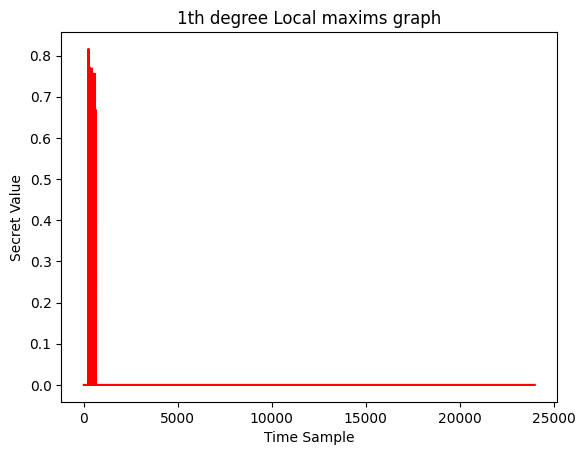

Number of uniques: 2
Number of local maxims: 46
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


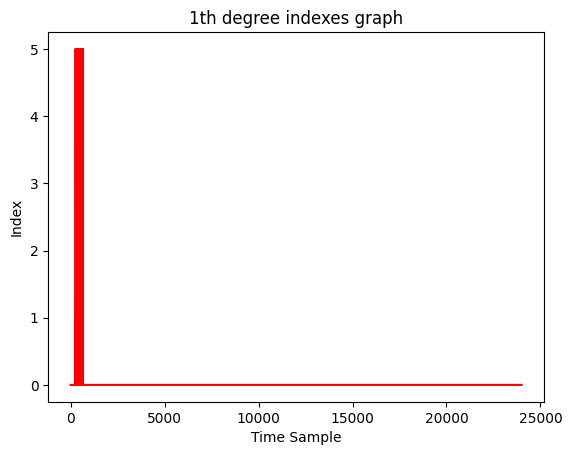

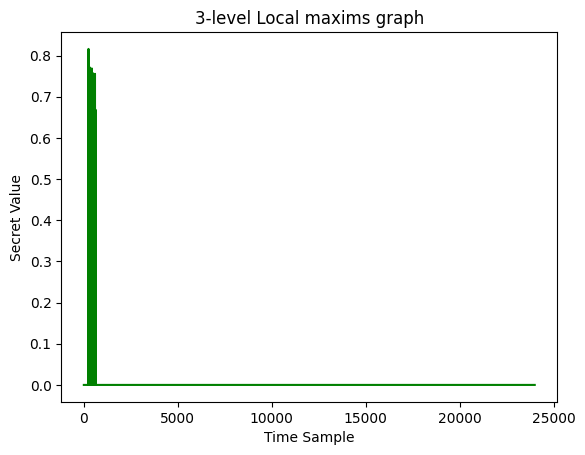

Number of uniques: 2
Number of local maxims: 8
Uniquess: [1, 5]
Local maxims: [1, 5, 5, 5, 5, 5, 5, 5]


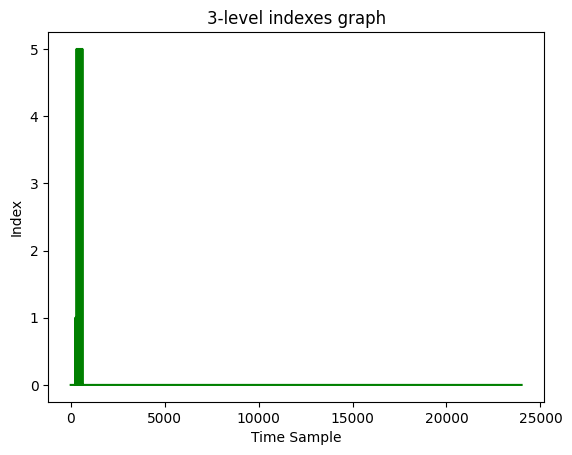

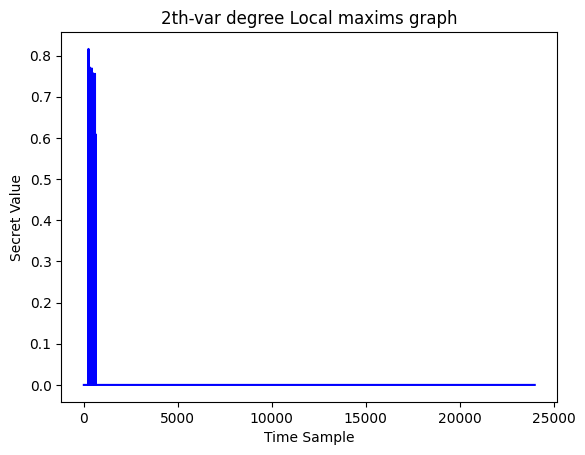

Number of uniques: 2
Number of local maxims: 9
Uniquess: [1, 5]
Local maxims: [1, 5, 5, 5, 5, 5, 5, 5, 5]


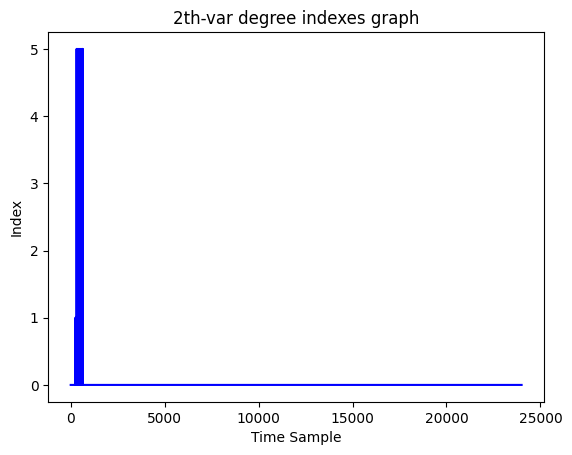

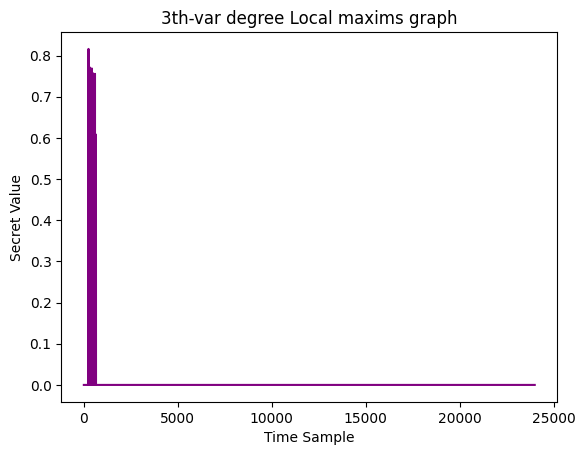

Number of uniques: 2
Number of local maxims: 25
Uniquess: [1, 5]
Local maxims: [1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


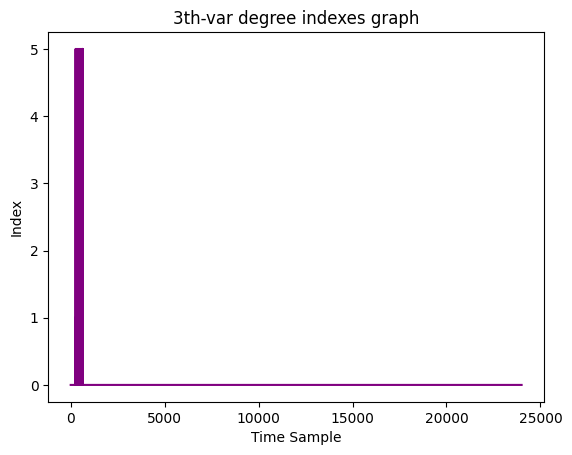

In range 0 - 24000
 Found the soonest secret value is 1, at the time sample 249, with correlation secret_corr = 0.816


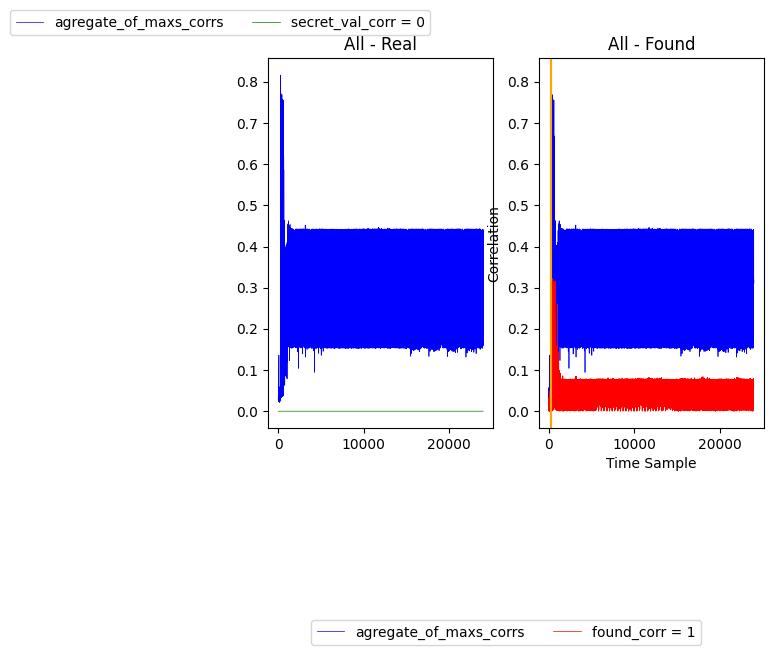

In range 282 - 24000
 Found the soonest secret value is 5, at the time sample 314, with correlation secret_corr = 0.771


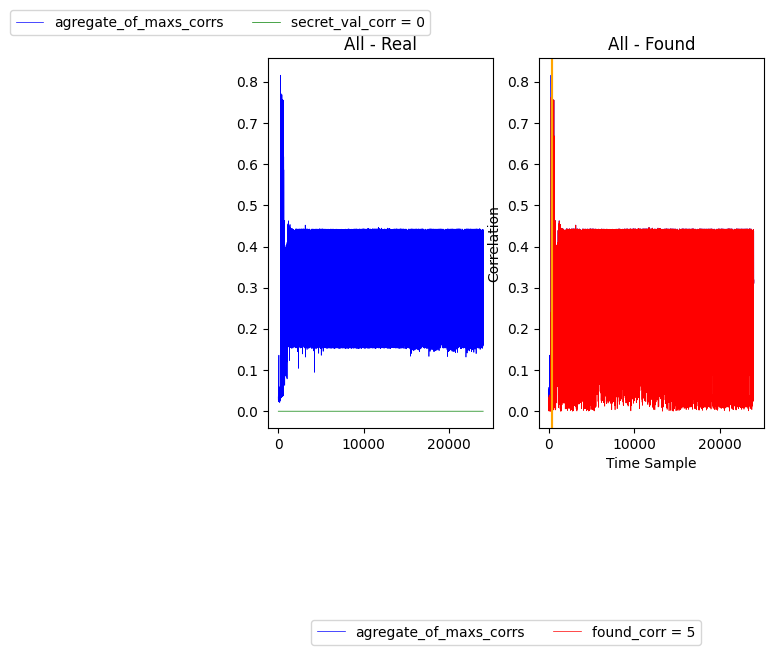

In range 342 - 24000
 Found the soonest secret value is 5, at the time sample 370, with correlation secret_corr = 0.765


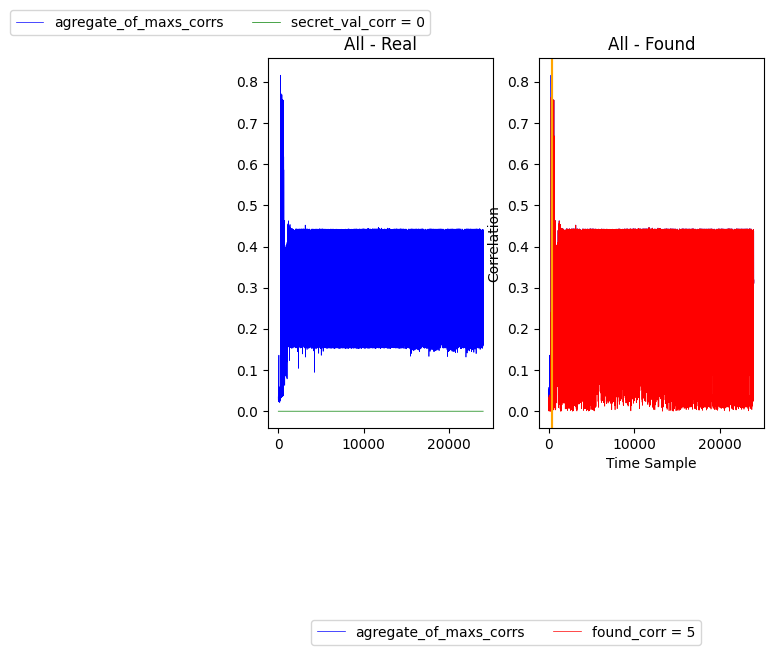

In range 398 - 24000
 Found the soonest secret value is 5, at the time sample 426, with correlation secret_corr = 0.769


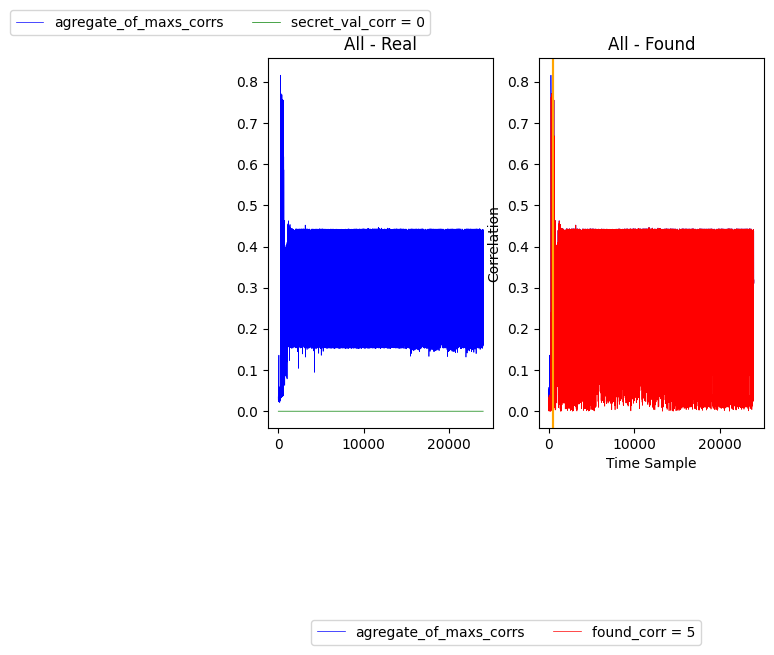

In range 454 - 24000
 Found the soonest secret value is 5, at the time sample 482, with correlation secret_corr = 0.757


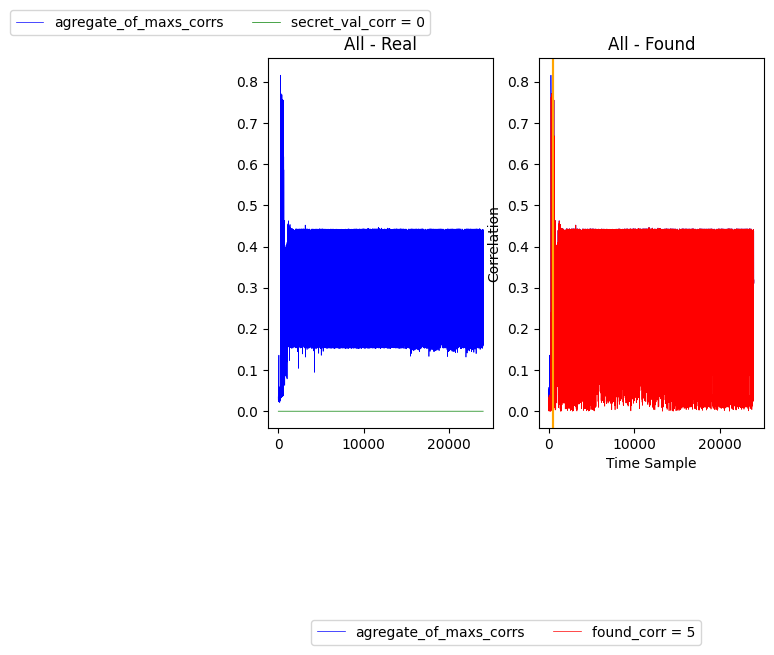

In [42]:
stop_num = 5
maxims_map = None
index = 0
index = 0

corr_map = abs(np.array(ncorr_all)[:,:])
#secret_weight = []
#for i in range(50):
#    secret_weight.append(i)
for secret in weights:
    secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(corr_map,
                                                                                                                 peak_range = 0.3,
                                                                                                                 show_info=True,
                                                                                                                 lastIndex=index,
                                                                                                                 map_2dgrMaxs=maxims_map,
                                                                                                                 mountain_half_dist = 5,
                                                                                                                level = 3)

    index = nextIndex
    figure, axis = plt.subplots(1, 2)
    # Comparison to real correlation
    axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
    axis[0].plot(corr_map[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
    #axis[0].legend(loc='upper right')
    axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
    axis[0].set_title("All - Real")
    plt.xlabel("Time Sample")
    plt.ylabel("Correlation")
    plt.axvline(x = index, color = 'orange')

    # Comparison to found correlation
    axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
    axis[1].plot(corr_map[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
    #axis[1].legend(loc='upper right')
    axis[1].legend(bbox_to_anchor=(0.75, -0.5), ncol=2)
    axis[1].set_title("All - Found")
    plt.axvline(x = index, color = 'orange')

    #figure.savefig(f'{name}_correlation.png')

    stop_num -= 1
    if stop_num == 0:
        break
    plt.show()
    last_found_indx = time_sample

In [77]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


In [78]:
weights

array([177, 129,   0, 152, 142,   0,  97,  66,   0,  53, 160,   0,  87,
       216,   0,  17, 105,   0, 226,  82,   0])

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

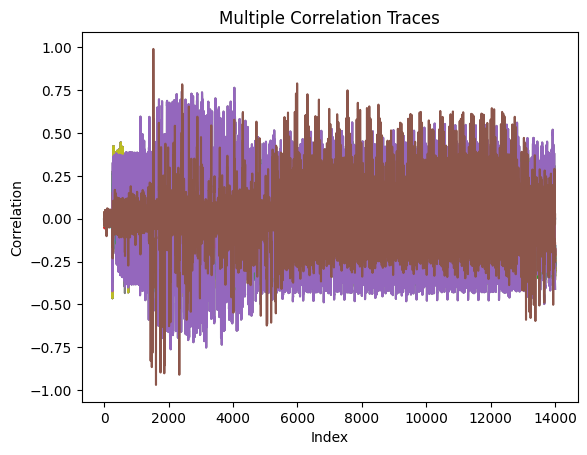

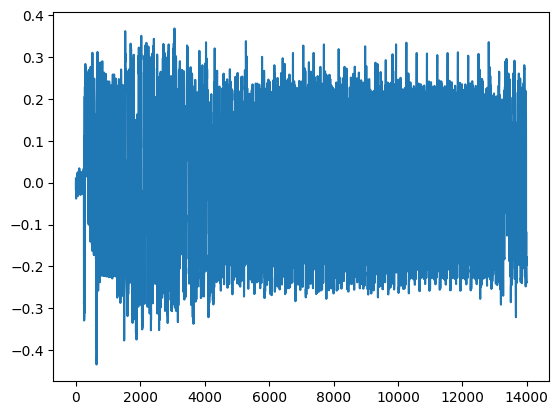

In [79]:
#Analysis
ith_weight = 0
epochs  =  5000
ncorr_all = V2_ANN_CPA_OTS(known_input = rand_input, waves = waves, n_traces = epochs, trace_len = 14000, calc_p_value = False)
plot_mult(np.array(ncorr_all)[:,:], _type = "tmp")
plt.plot(ncorr_all[177])
plt.show()

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

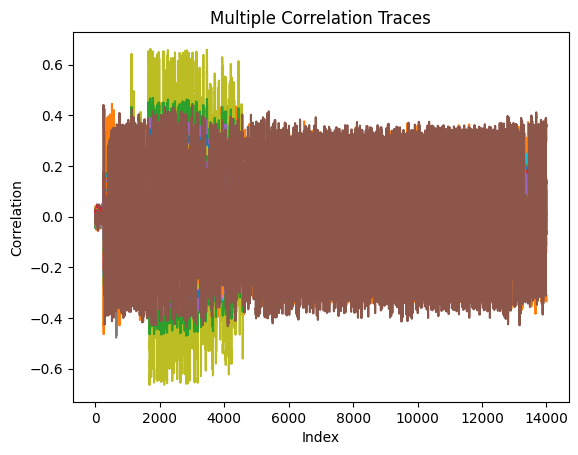

In [26]:
#Analysis
ith_weight = 0
epochs  =  5000
ncorr_all = V2_ANN_CPA_OTS(known_input = rand_input, waves = waves, n_traces = epochs, trace_len = 14000, calc_p_value = False)
plot_mult(np.array(ncorr_all)[:,:], _type = "tmp")
plt.plot(ncorr_all[177])
plt.show()

### Get weights

In [63]:
%run "./Analyser.ipynb"

✔️ The Analyser succesfuly runned.


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01108657 0.00741666 0.008679   ... 0.33506068 0.32729733 0.31152184]
 [0.01362667 0.00629412 0.01114756 ... 0.01059773 0.01258632 0.0154629 ]
 ...
 [0.01825064 0.02351102 0.00873667 ... 0.1121432  0.10223093 0.09617812]
 [0.00581129 0.00472941 0.00388187 ... 0.02260998 0.00974858 0.02861844]
 [0.00148902 0.00496238 0.00099493 ... 0.36433888 0.32898034 0.29888986]]
14000
 Index of global max: 1681 and global_max_val: 0.664139754140457


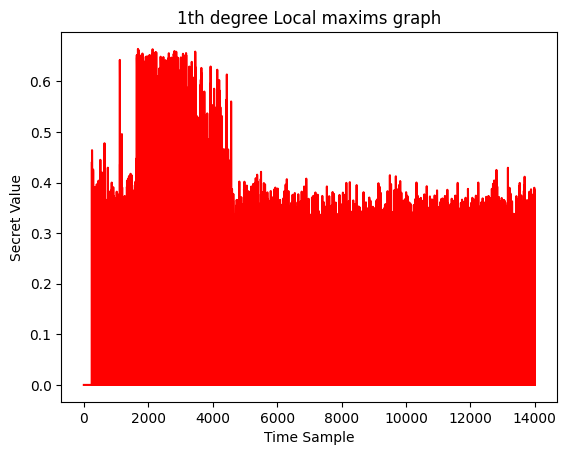

Number of uniques: 56
Number of local maxims: 6381
Uniquess: [255, 1, 2, 136, 177, 128, 127, 206, 49, 50, 130, 179, 178, 78, 77, 65, 207, 191, 73, 109, 25, 155, 126, 129, 63, 39, 202, 81, 217, 185, 249, 153, 19, 101, 71, 237, 167, 51, 105, 111, 213, 75, 141, 251, 242, 201, 37, 183, 145, 205, 147, 233, 115, 40, 23, 219]
Local maxims: [255, 255, 1, 1, 1, 1, 1, 1, 2, 2, 255, 1, 1, 1, 1, 1, 1, 1, 255, 1, 1, 1, 1, 1, 255, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 2, 255, 1, 1, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 1, 1, 1, 1, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 136, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 2

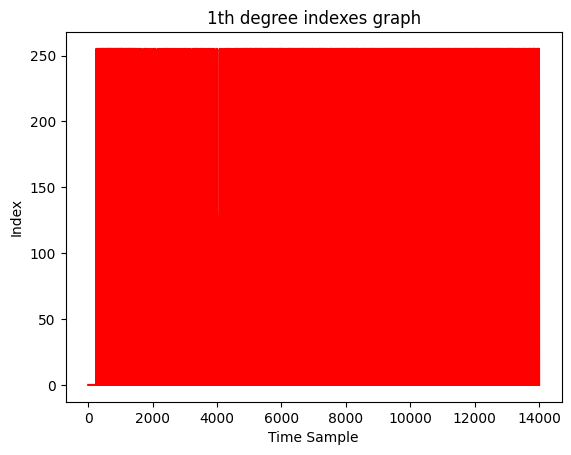

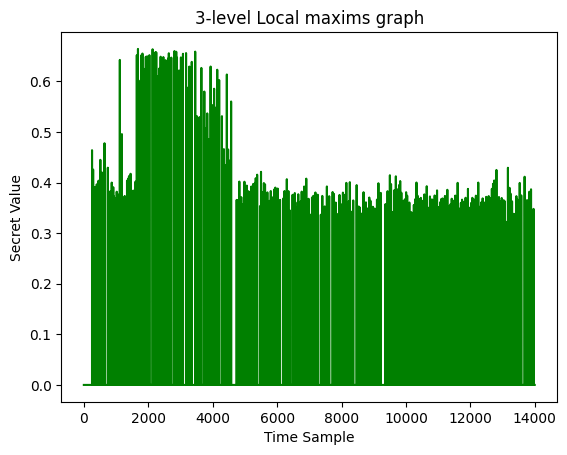

Number of uniques: 4
Number of local maxims: 276
Uniquess: [1, 255, 177, 128]
Local maxims: [1, 255, 255, 255, 255, 1, 1, 255, 1, 255, 1, 255, 177, 1, 255, 255, 255, 255, 255, 255, 255, 128, 128, 255, 255, 255, 1, 128, 255, 1, 255, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 128, 128, 128, 128, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

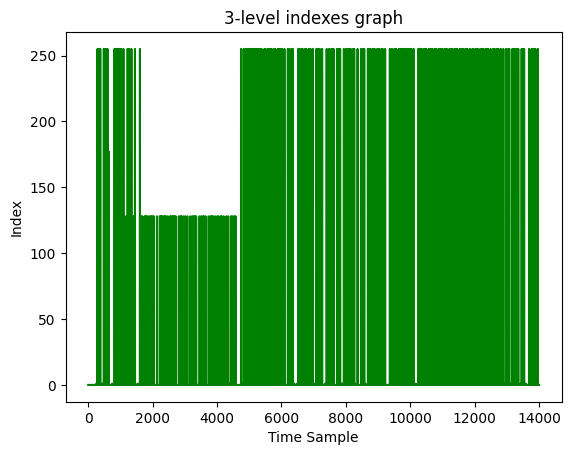

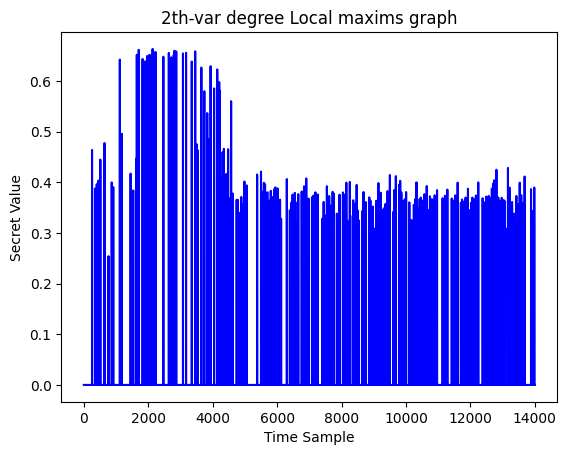

Number of uniques: 4
Number of local maxims: 229
Uniquess: [1, 177, 255, 128]
Local maxims: [1, 1, 1, 1, 1, 177, 255, 255, 255, 128, 128, 255, 1, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 1, 1, 128, 1, 255, 128, 128, 1, 128, 255, 255, 1, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 1, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

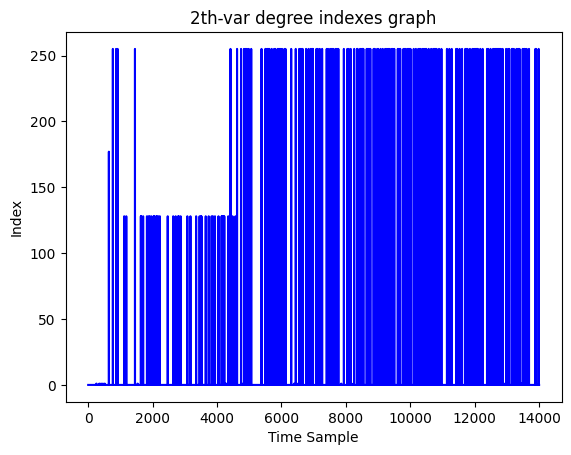

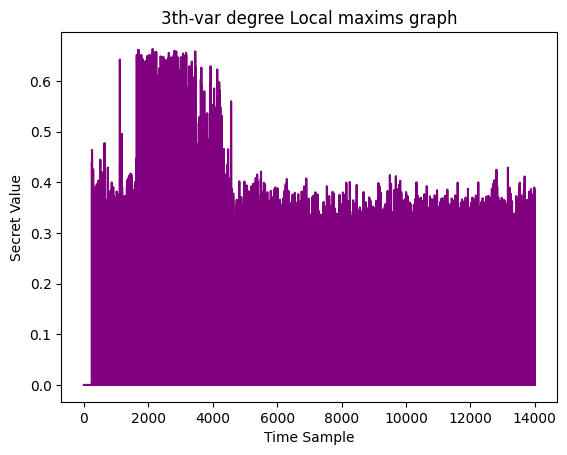

Number of uniques: 56
Number of local maxims: 5116
Uniquess: [255, 1, 2, 136, 177, 128, 127, 206, 49, 50, 130, 179, 178, 78, 77, 65, 207, 191, 73, 109, 25, 155, 126, 129, 63, 39, 202, 81, 217, 185, 249, 153, 19, 101, 71, 237, 167, 51, 105, 111, 213, 75, 141, 251, 242, 201, 37, 183, 145, 205, 147, 233, 115, 40, 23, 219]
Local maxims: [255, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 255, 1, 1, 1, 1, 1, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 2, 255, 1, 1, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 1, 1, 1, 255, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 1, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 1, 1, 1, 136, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 177, 177, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

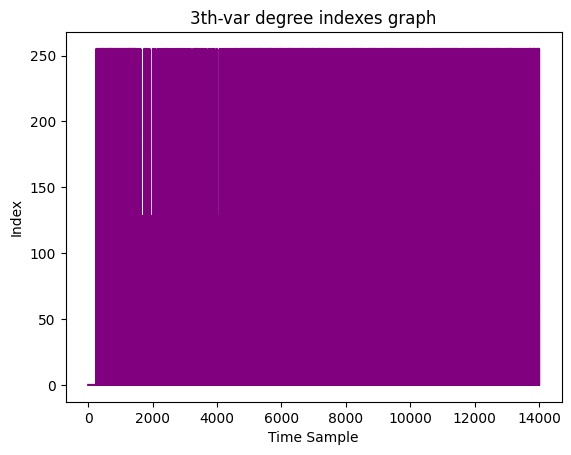

In range 0 - 14000
 Found the soonest secret value is 1, at the time sample 255, with correlation secret_corr = 0.464


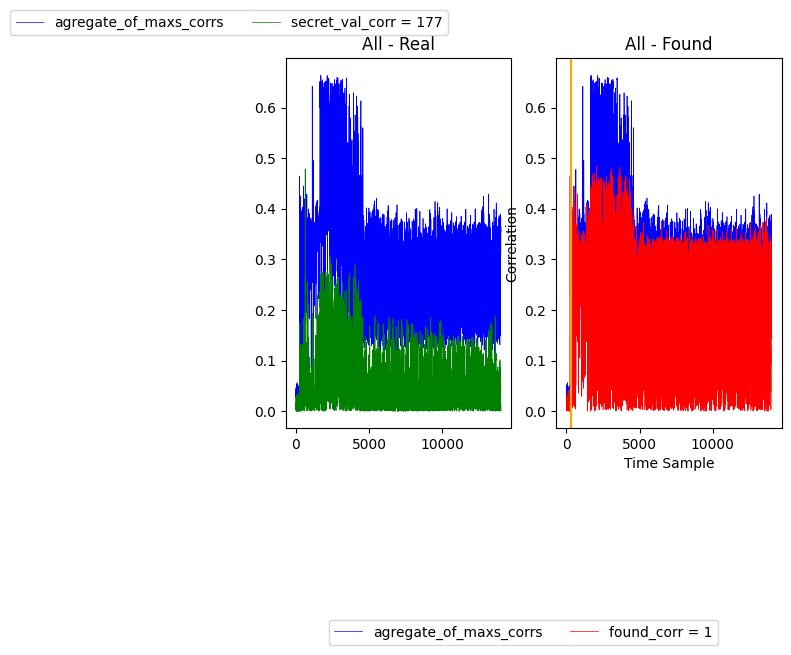

In range 300 - 14000
 Found the soonest secret value is 1, at the time sample 346, with correlation secret_corr = 0.388


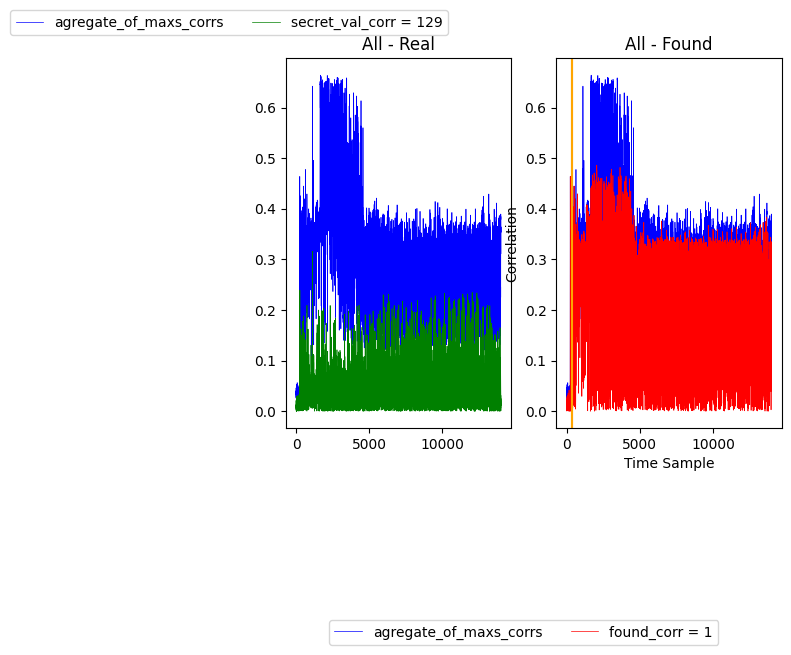

In range 373 - 14000
 Found the soonest secret value is 1, at the time sample 401, with correlation secret_corr = 0.396


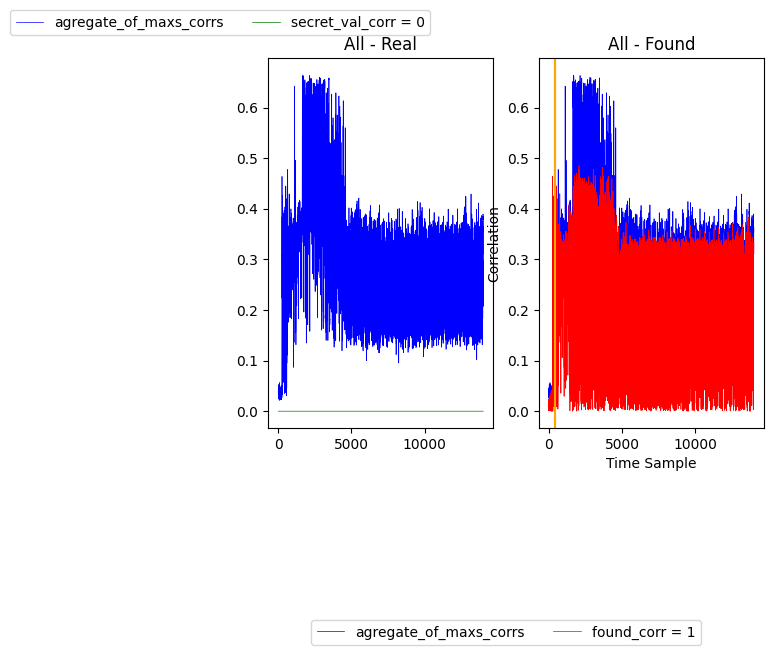

In range 429 - 14000
 Found the soonest secret value is 1, at the time sample 457, with correlation secret_corr = 0.404


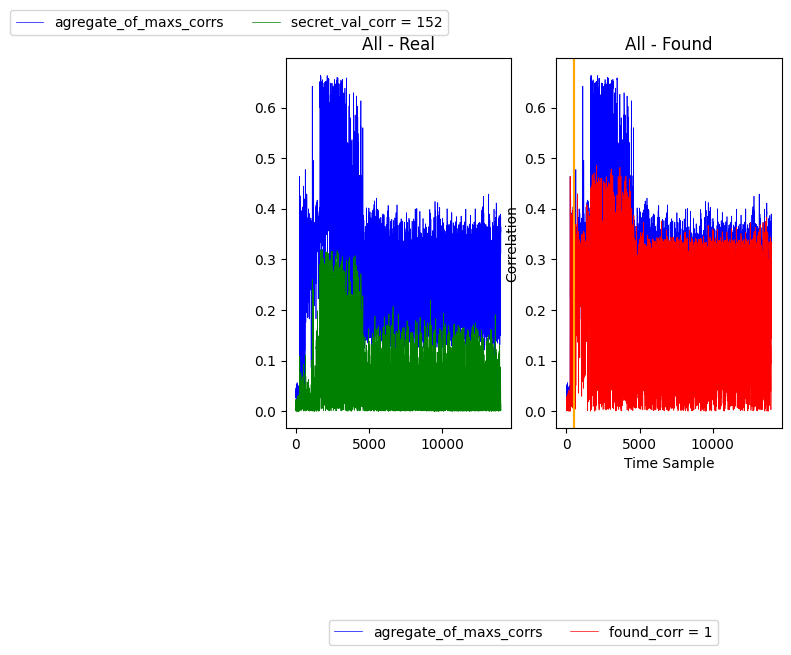

In range 485 - 14000
 Found the soonest secret value is 1, at the time sample 513, with correlation secret_corr = 0.445


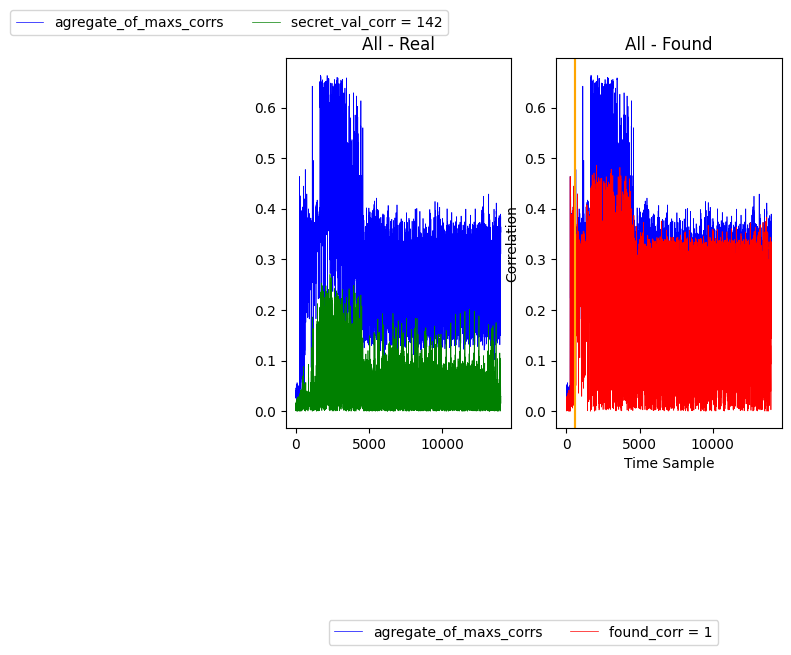

In [64]:
stop_num = 5
maxims_map = None
index = 0
maxims_map = None
corr_map = abs(np.array(ncorr_all))
print(corr_map)
#secret_weight = []
#for i in range(50):
#    secret_weight.append(i)
for secret in weights:
    secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map  = get_weight(corr_map,
                                                                                                                 peak_range = 0.5,
                                                                                                                 show_info=True,
                                                                                                                 lastIndex=index,
                                                                                                                 map_2dgrMaxs=maxims_map,
                                                                                                                 mountain_half_dist = 5,
                                                                                                                level = 3)

    index = nextIndex
    figure, axis = plt.subplots(1, 2)
    # Comparison to real correlation
    axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
    axis[0].plot(corr_map[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
    #axis[0].legend(loc='upper right')
    axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
    axis[0].set_title("All - Real")
    plt.xlabel("Time Sample")
    plt.ylabel("Correlation")
    plt.axvline(x = index, color = 'orange')

    # Comparison to found correlation
    axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
    axis[1].plot(corr_map[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
    #axis[1].legend(loc='upper right')
    axis[1].legend(bbox_to_anchor=(0.75, -0.5), ncol=2)
    axis[1].set_title("All - Found")
    plt.axvline(x = index, color = 'orange')

    #figure.savefig(f'{name}_correlation.png')

    stop_num -= 1
    if stop_num == 0:
        break
    plt.show()
    last_found_indx = time_sample

#### Archive

In [132]:
#E:/DP_database/database
waves = np.load("E:/DP_database/database/waves__722_BasicMLP_Dec1-ntg1-10000.npy")
ncorr_all = np.load("E:/DP_database/database/corrs__722_BasicMLP_Dec1-ntg1-10000.npy")
secret_weight = np.load("E:/DP_database/database/weights__722_BasicMLP_Dec1-ntg1-10000.csv.npy")

In [133]:
secret_weight

array([ 45, 207,   0,  70,  41,   0,   4, 180,   0, 120, 216,   0, 104,
       167,   0, 255,  63,   0,  43, 241,   0])

429
 Index of global max: 741 and global_max_val: 0.988485794428921


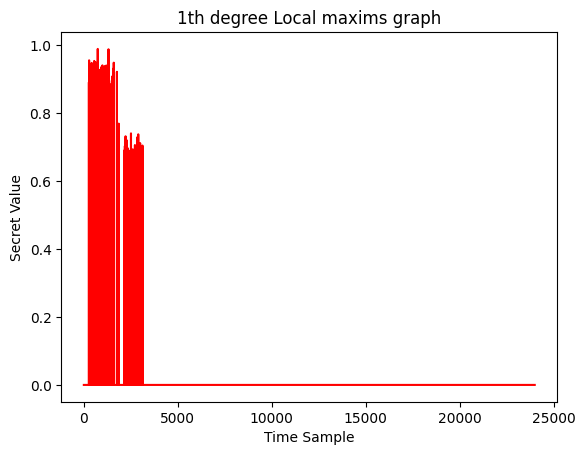

Number of uniques: 9
Number of local maxims: 230
Uniquess: [1, 45, 180, 90, 207, 76, 158, 242, 228]
Local maxims: [1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 180, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 90, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 45, 45, 45, 90, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 207, 207, 158, 158, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 228, 242, 242, 242, 242, 242, 

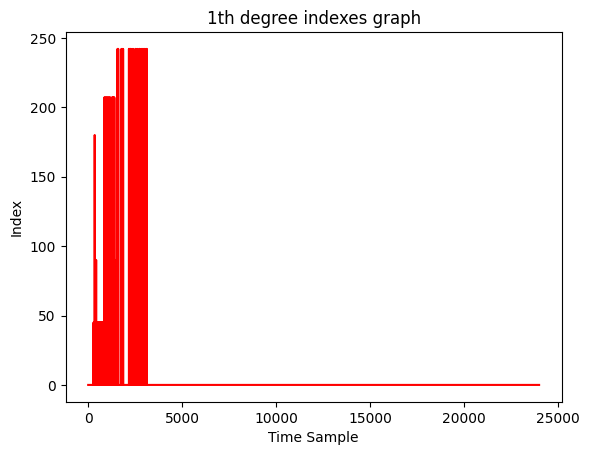

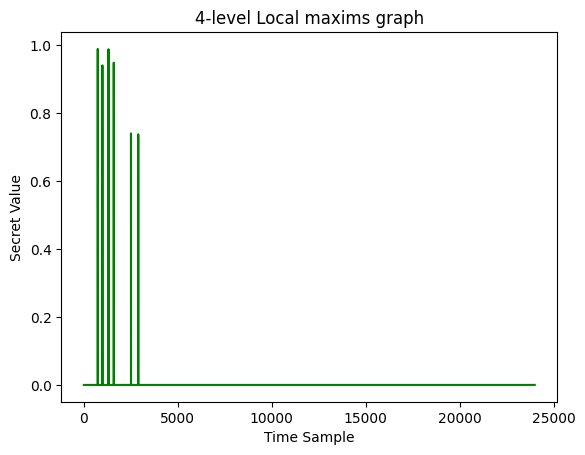

Number of uniques: 3
Number of local maxims: 6
Uniquess: [45, 207, 242]
Local maxims: [45, 207, 207, 242, 242, 242]


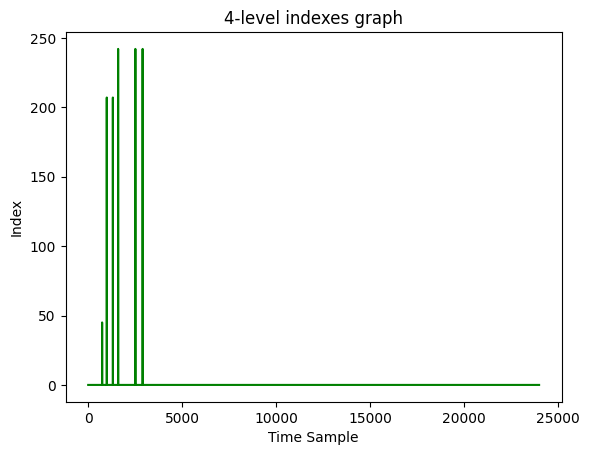

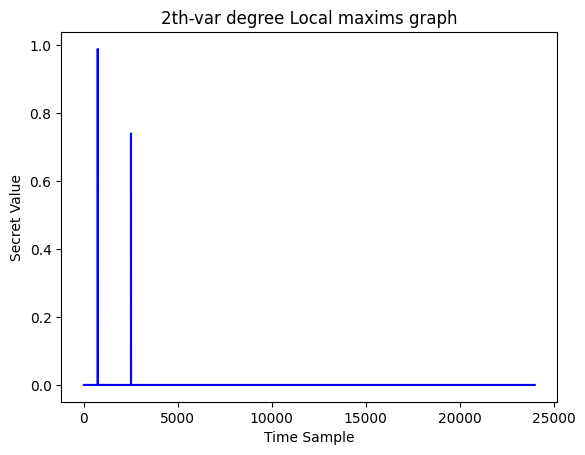

Number of uniques: 2
Number of local maxims: 2
Uniquess: [45, 242]
Local maxims: [45, 242]


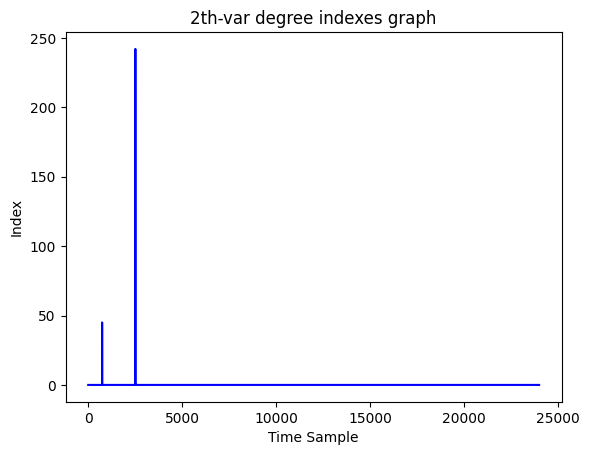

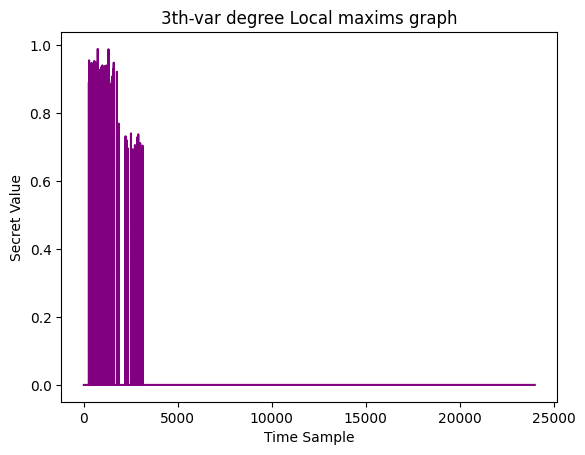

Number of uniques: 9
Number of local maxims: 145
Uniquess: [1, 45, 180, 90, 207, 76, 158, 242, 228]
Local maxims: [1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 90, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 45, 45, 76, 76, 76, 76, 76, 76, 76, 76, 207, 158, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 228, 228, 228, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 228, 228, 242]


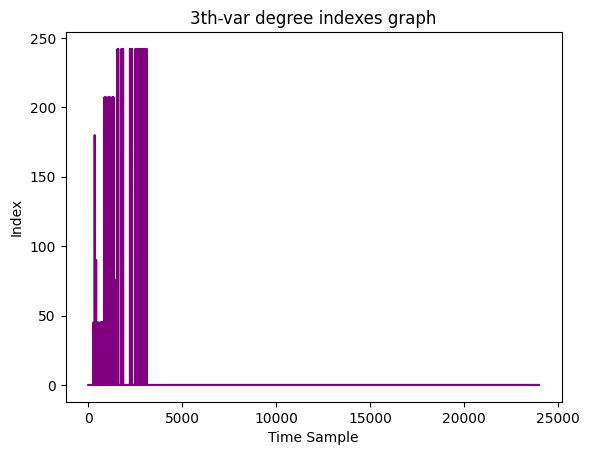

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 741, with correlation secret_corr = 0.988


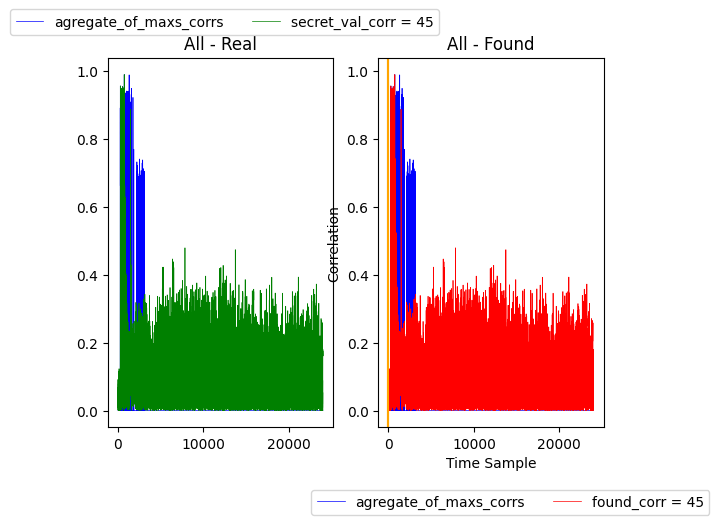

In range 1626 - 24000
 Found the soonest secret value is 242, at the time sample 2510, with correlation secret_corr = 0.740


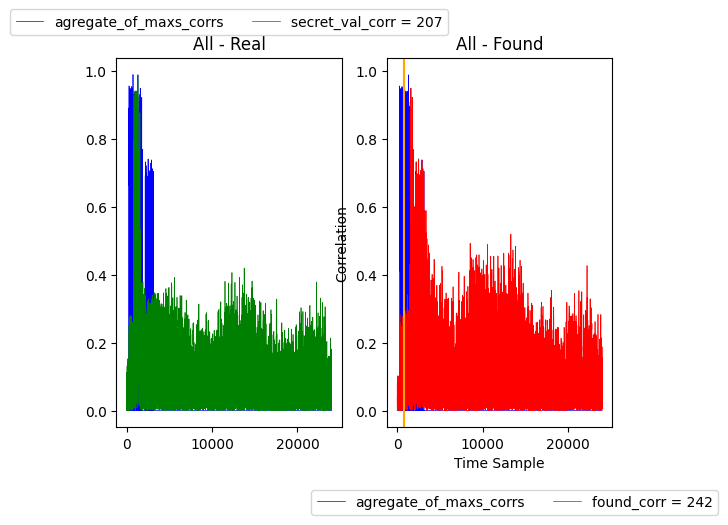

In range 1626 - 24000
 Found the soonest secret value is 242, at the time sample 2510, with correlation secret_corr = 0.740


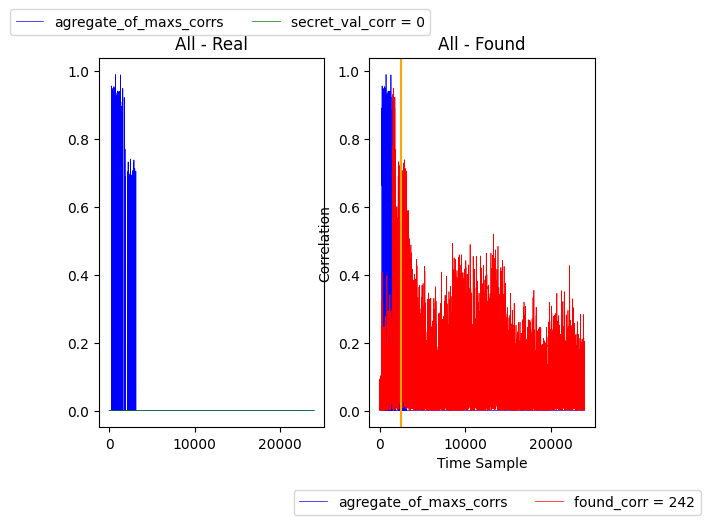

In range 1626 - 24000
 Found the soonest secret value is 242, at the time sample 2510, with correlation secret_corr = 0.740


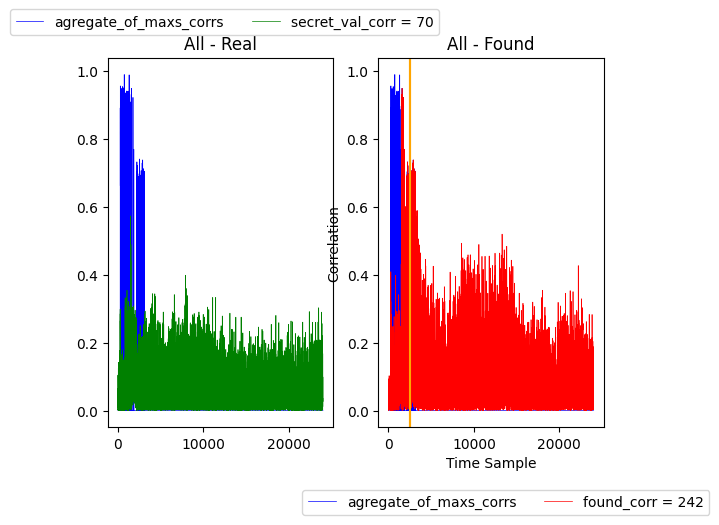

In range 1626 - 24000
 Found the soonest secret value is 242, at the time sample 2510, with correlation secret_corr = 0.740


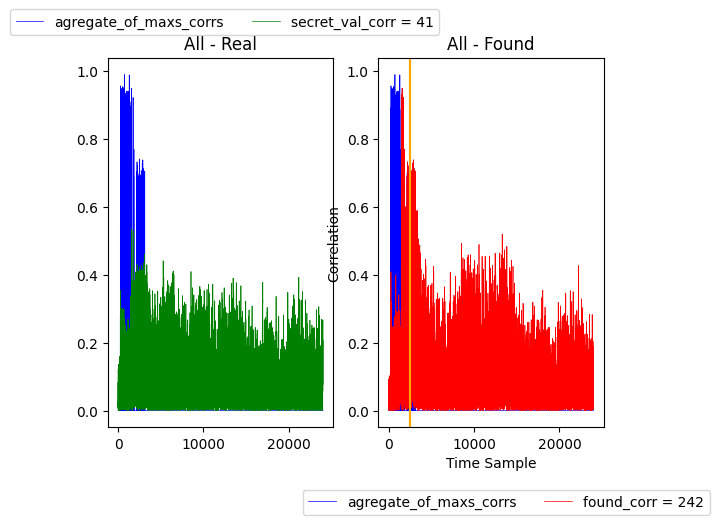

In [134]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     min_treshold = 0.65,
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 200,
                                                                                                                     level = 4)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(1.5, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(1.5, -0.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In [121]:
#E:/DP_database/database
waves = np.load("E:/DP_database/database/waves__722_BasicMLP_Dec1-ntg1-1200.npy")
ncorr_all = np.load("E:/DP_database/database/corrs__722_BasicMLP_Dec1-ntg1-1200.npy")
secret_weight = np.load("E:/DP_database/database/weights__722_BasicMLP_Dec1-ntg1-1200.csv.npy")

In [128]:
secret_weight

array([ 45, 207,   0,  70,  41,   0,   4, 180,   0, 120, 216,   0, 104,
       167,   0, 255,  63,   0,  43, 241,   0])

284
 Index of global max: 741 and global_max_val: 0.9888938103194048


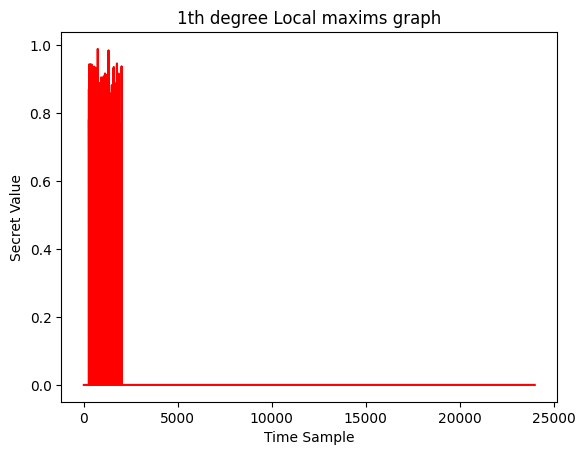

Number of uniques: 9
Number of local maxims: 156
Uniquess: [1, 45, 180, 207, 158, 76, 242, 28, 249]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 1, 1, 207, 207, 207, 207, 207, 158, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 45, 45, 180, 76, 76, 76, 76, 76, 76, 76, 76, 76, 207, 207, 158, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 28, 242, 242, 242, 242, 242, 249, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242]


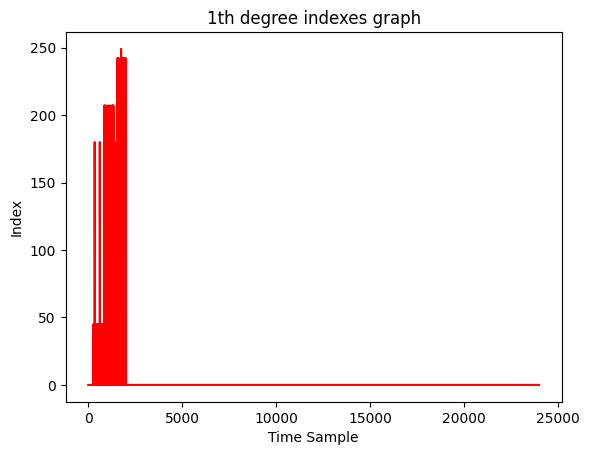

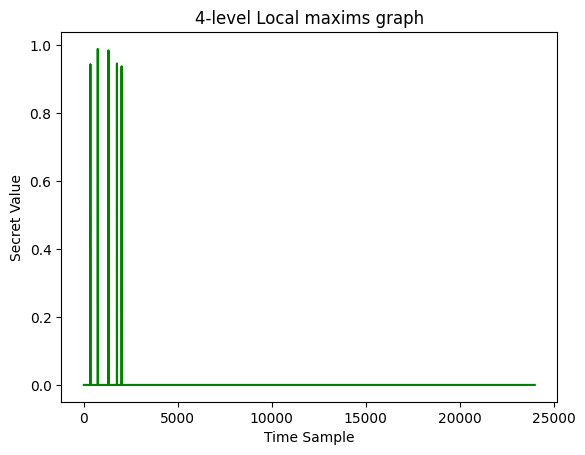

Number of uniques: 3
Number of local maxims: 5
Uniquess: [45, 207, 242]
Local maxims: [45, 45, 207, 242, 242]


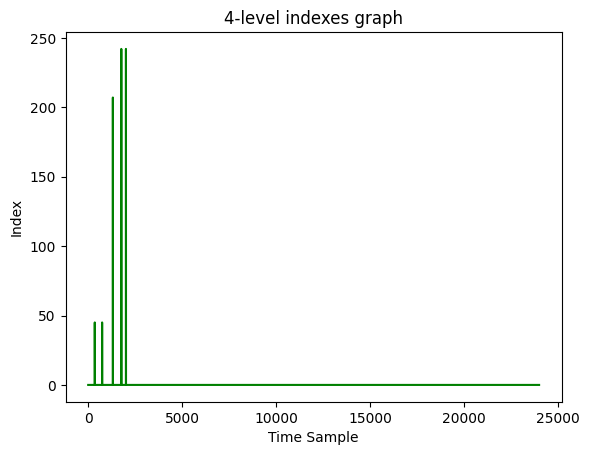

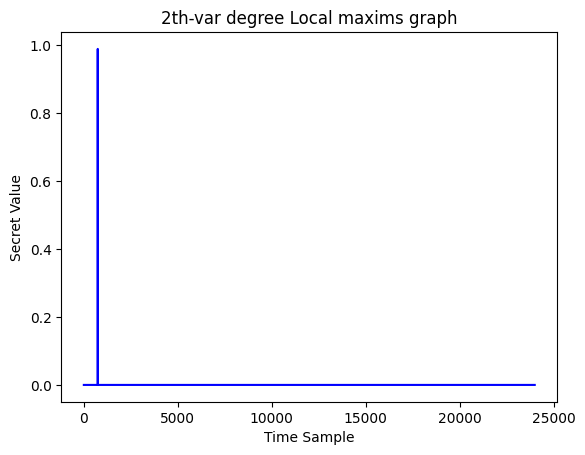

Number of uniques: 1
Number of local maxims: 1
Uniquess: [45]
Local maxims: [45]


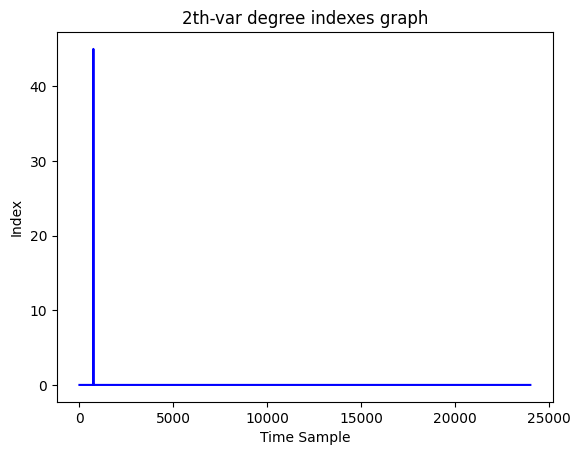

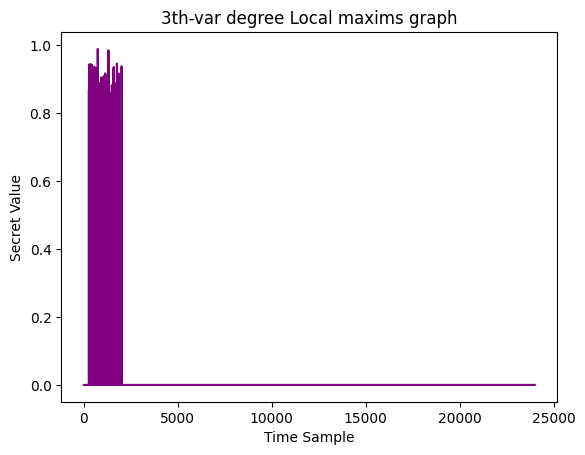

Number of uniques: 6
Number of local maxims: 93
Uniquess: [1, 45, 207, 76, 242, 28]
Local maxims: [1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 1, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 45, 76, 76, 76, 76, 76, 207, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 28, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242, 242]


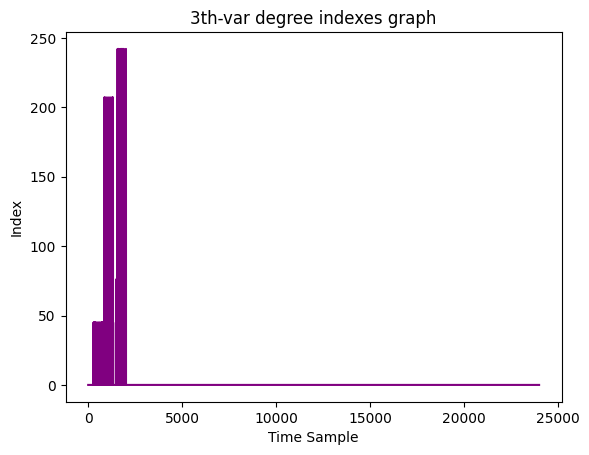

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 741, with correlation secret_corr = 0.989


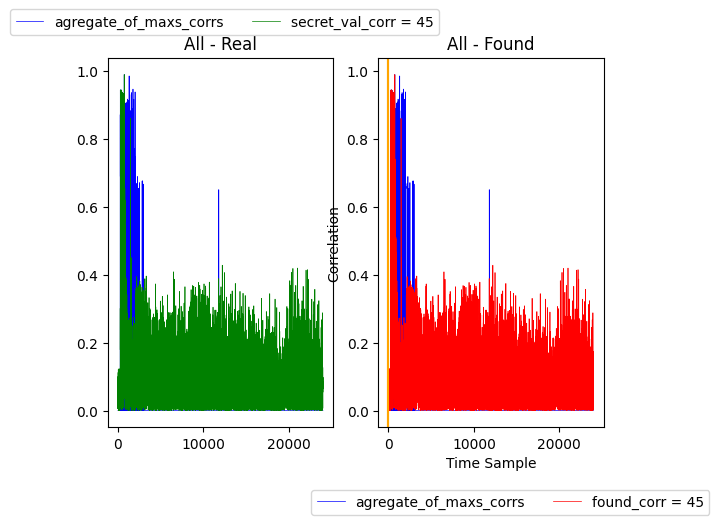

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 741, with correlation secret_corr = 0.989


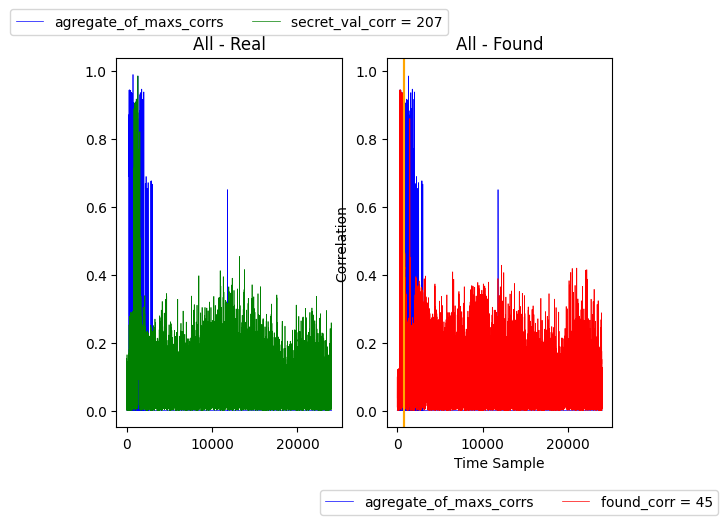

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 741, with correlation secret_corr = 0.989


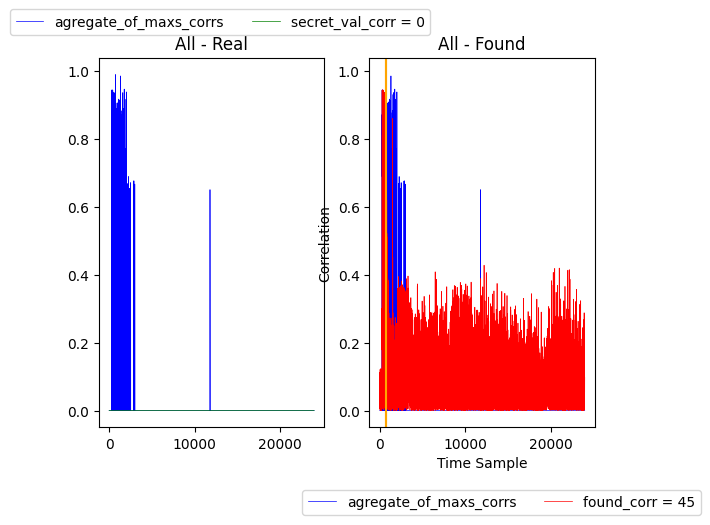

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 741, with correlation secret_corr = 0.989


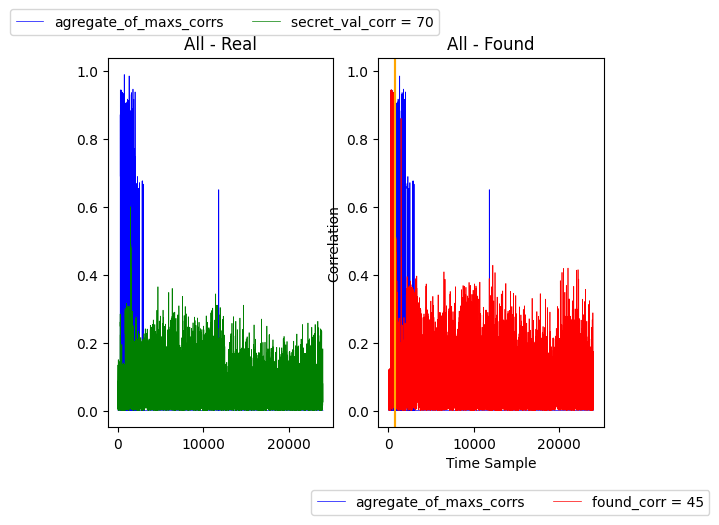

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 741, with correlation secret_corr = 0.989


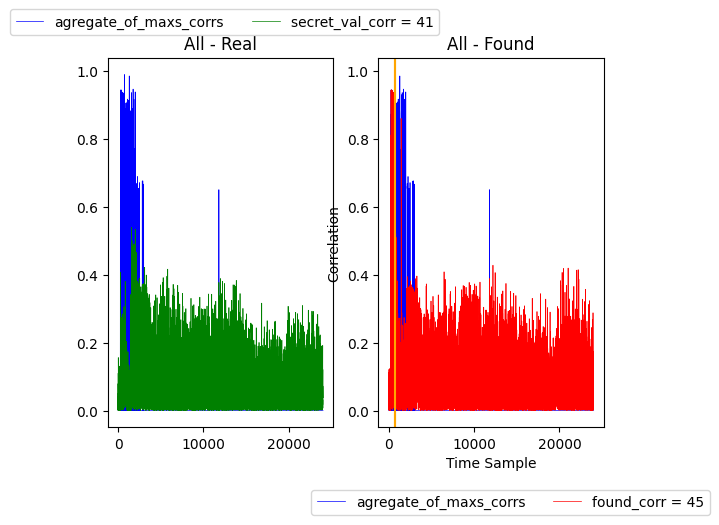

In [127]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     min_treshold = 0.65,
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 200,
                                                                                                                     level = 4)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(1.5, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(1.5, -0.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In [114]:
#E:/DP_database/database
waves = np.load("E:/DP_database/database/waves__712_BasicMLP_Dec1-ntg1-1200.npy")
ncorr_all = np.load("E:/DP_database/database/corrs__712_BasicMLP_Dec1-ntg1-1200.npy")
secret_weight = np.load("E:/DP_database/database/weights__712_BasicMLP_Dec1-ntg1-1200.csv.npy")

734
 Index of global max: 742 and global_max_val: 0.9774290656192981


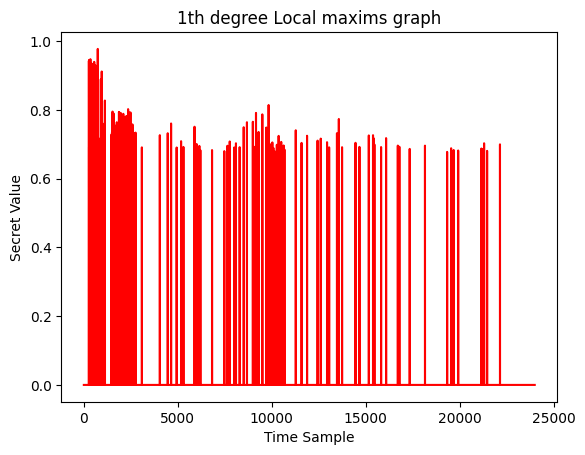

Number of uniques: 20
Number of local maxims: 342
Uniquess: [1, 45, 90, 180, 248, 8, 184, 120, 232, 136, 240, 224, 112, 72, 56, 104, 208, 24, 200, 16]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 90, 45, 45, 45, 45, 45, 45, 180, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 248, 248, 248, 248, 248, 248, 248, 248, 8, 8, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 184, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 2

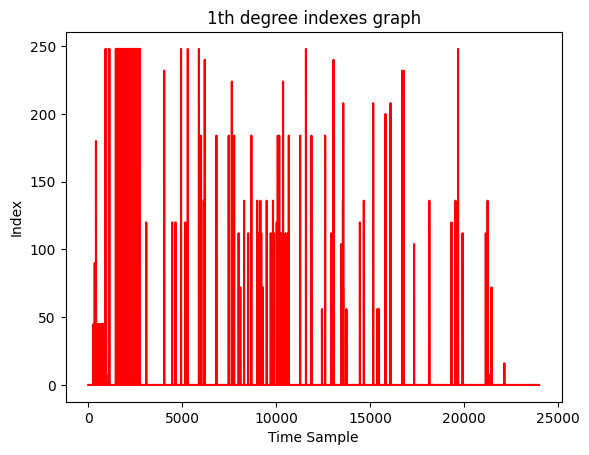

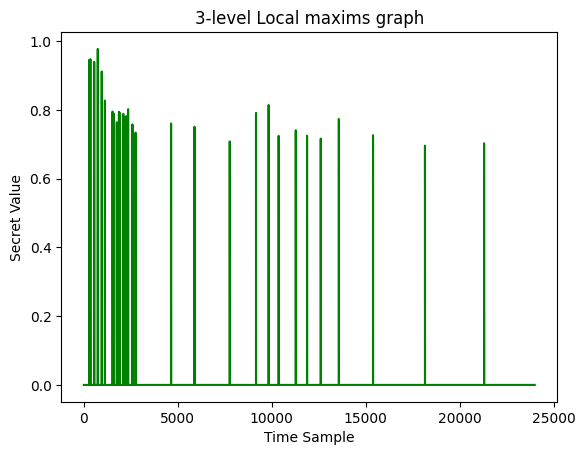

Number of uniques: 9
Number of local maxims: 30
Uniquess: [45, 248, 120, 184, 136, 224, 208, 56, 8]
Local maxims: [45, 45, 45, 45, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 120, 248, 184, 136, 136, 224, 184, 184, 184, 208, 56, 136, 8]


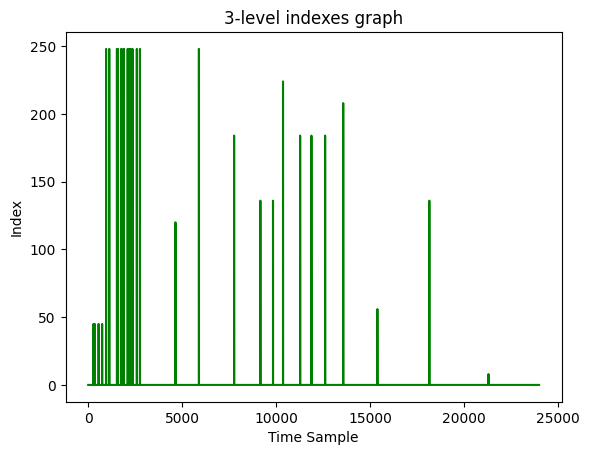

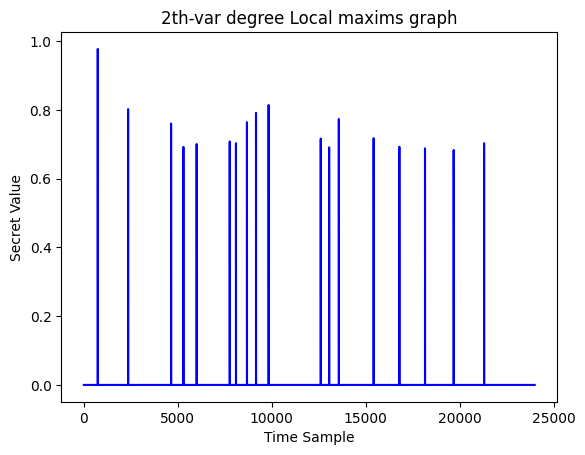

Number of uniques: 10
Number of local maxims: 18
Uniquess: [45, 248, 120, 184, 72, 136, 240, 208, 24, 8]
Local maxims: [45, 248, 120, 248, 184, 184, 72, 184, 136, 136, 184, 240, 208, 24, 208, 72, 248, 8]


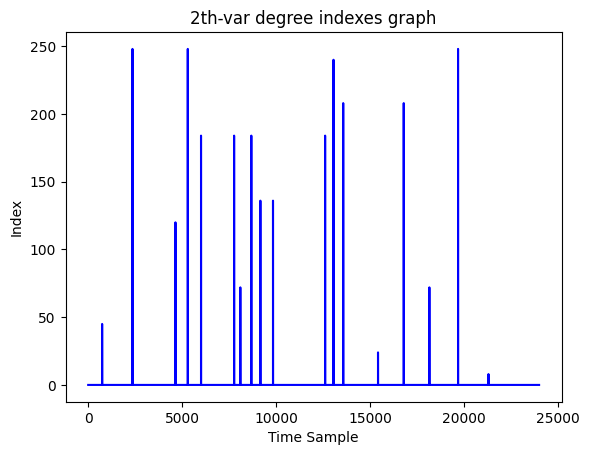

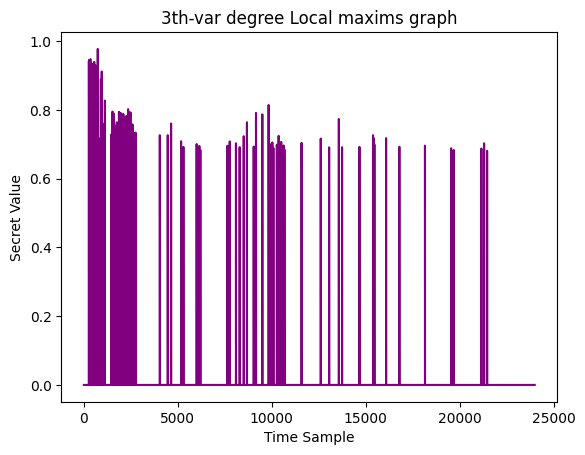

Number of uniques: 15
Number of local maxims: 214
Uniquess: [1, 45, 248, 8, 184, 232, 120, 136, 240, 224, 72, 112, 208, 56, 24]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 248, 248, 248, 248, 248, 248, 8, 248, 248, 248, 248, 248, 248, 248, 248, 248, 184, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 232, 120, 120, 120, 248, 184, 136, 240, 224, 224, 184, 184, 72, 136, 136, 136, 112, 184, 184, 184, 112, 136, 136, 136, 112, 120, 

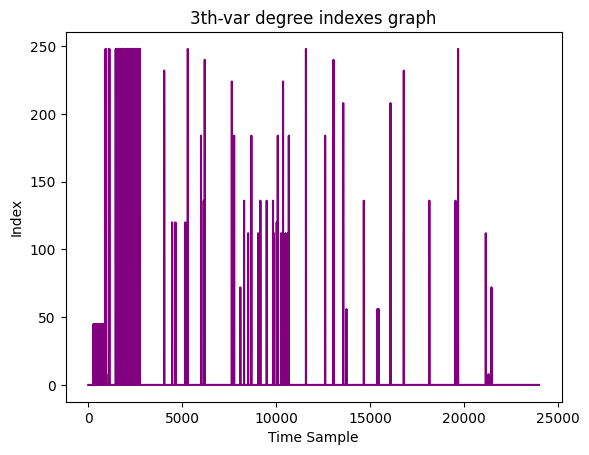

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 742, with correlation secret_corr = 0.977


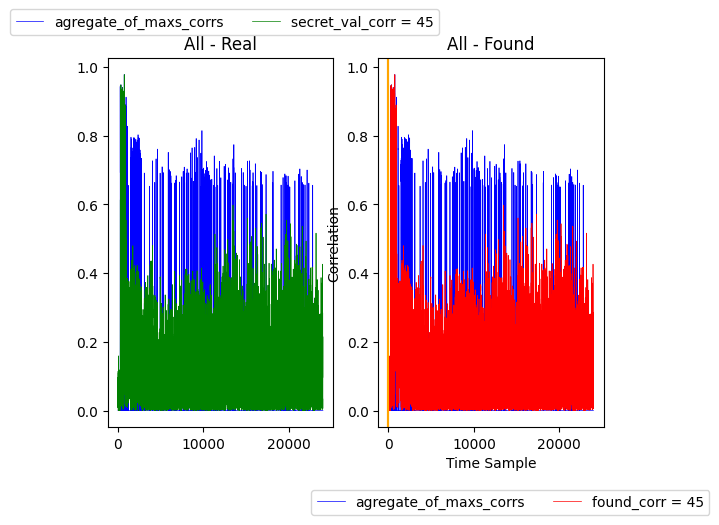

In range 1549 - 24000
 Found the soonest secret value is 248, at the time sample 2357, with correlation secret_corr = 0.802


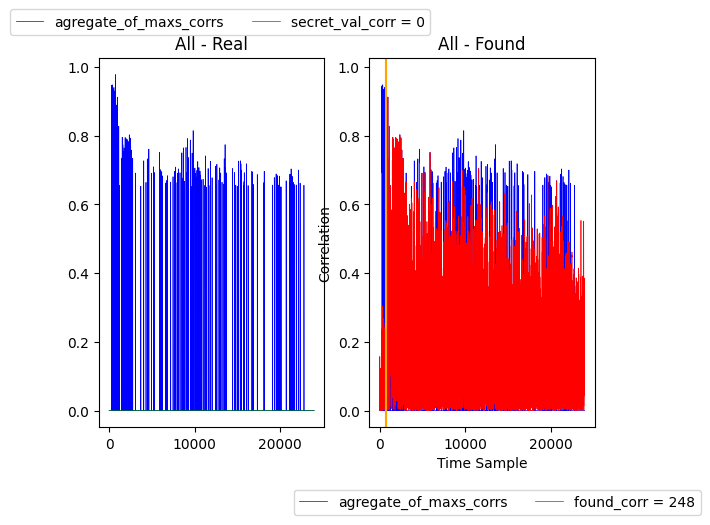

In range 3500 - 24000
 Found the soonest secret value is 120, at the time sample 4644, with correlation secret_corr = 0.761


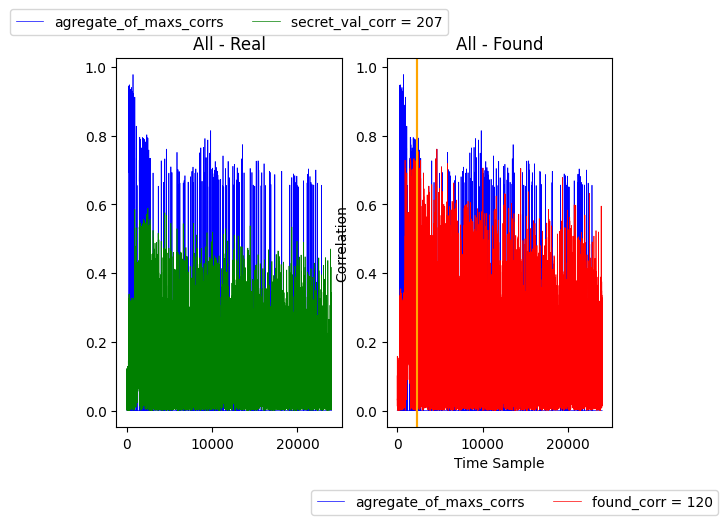

In range 4972 - 24000
 Found the soonest secret value is 248, at the time sample 5300, with correlation secret_corr = 0.692


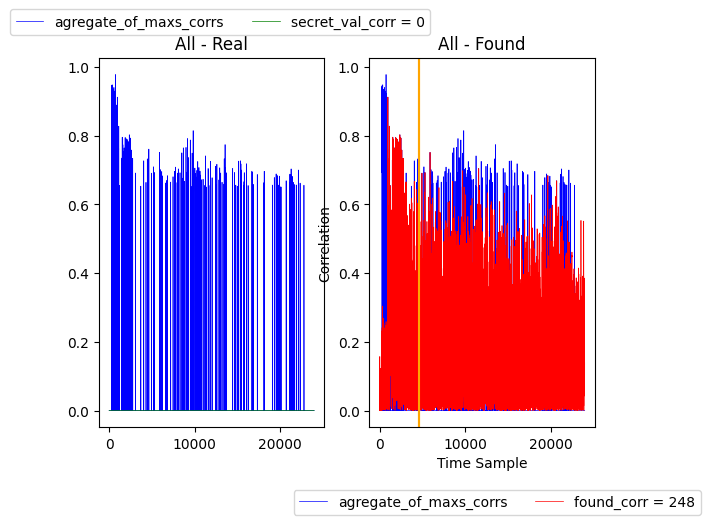

In range 5653 - 24000
 Found the soonest secret value is 184, at the time sample 6005, with correlation secret_corr = 0.701


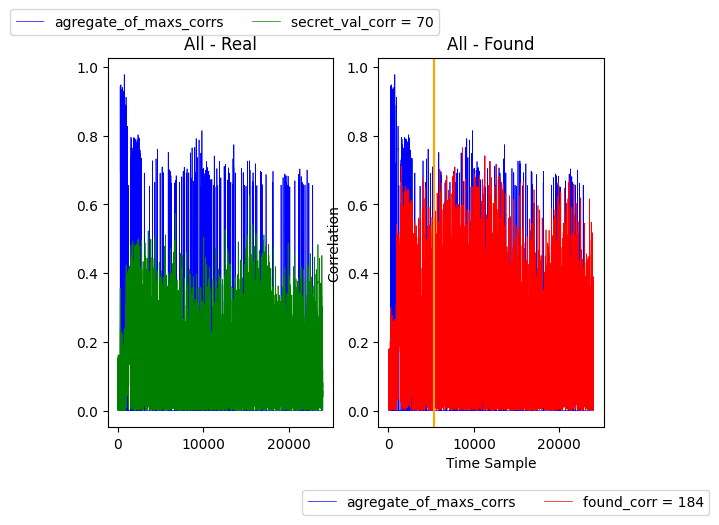

In [115]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     min_treshold = 0.65,
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 200,
                                                                                                                     level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(1.5, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(1.5, -0.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In [ ]:
#E:/DP_database/database
waves = np.load("E:/DP_database/database/waves__712_BasicMLP_Dec2-ntg2-1200.npy")
ncorr_all = np.load("E:/DP_database/database/corrs__712_BasicMLP_Dec2-ntg2-1200.npy")
secret_weight = np.load("E:/DP_database/database/weights__712_BasicMLP_Dec2-ntg2-1200.csv.npy")

425
 Index of global max: 370 and global_max_val: 0.9827554271979879


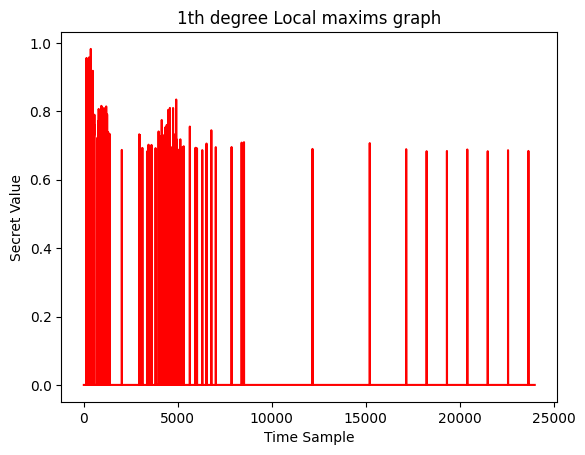

Number of uniques: 14
Number of local maxims: 235
Uniquess: [1, 45, 248, 240, 144, 184, 136, 96, 112, 56, 208, 48, 232, 104]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 240, 240, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 240, 248, 248, 248, 248, 248, 248, 248, 248, 248, 240, 248, 248, 248, 248, 248, 248, 240, 240, 248, 240, 248, 248, 248, 248, 248, 248, 248, 240, 248, 248, 248, 248, 248, 248, 240, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 144, 248, 184, 136, 184, 184, 136, 136, 96, 112, 184, 136, 112, 136, 13

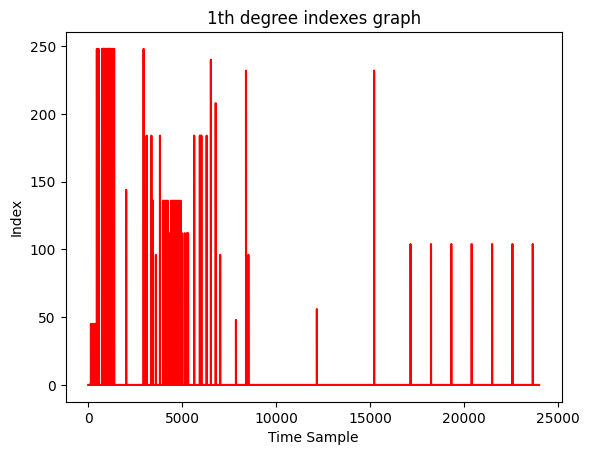

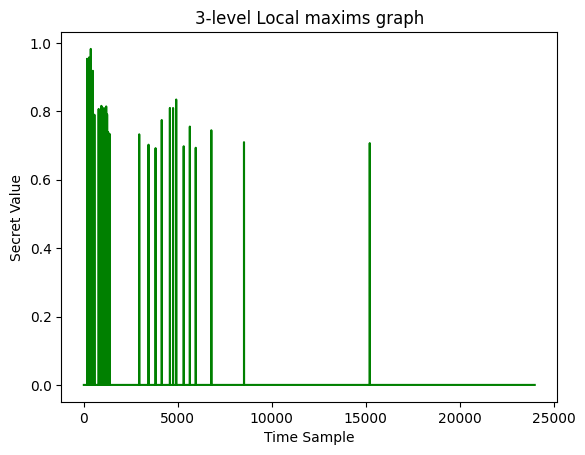

Number of uniques: 8
Number of local maxims: 28
Uniquess: [45, 248, 136, 112, 184, 208, 96, 232]
Local maxims: [45, 45, 45, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 136, 112, 136, 136, 136, 136, 112, 184, 184, 208, 96, 232]


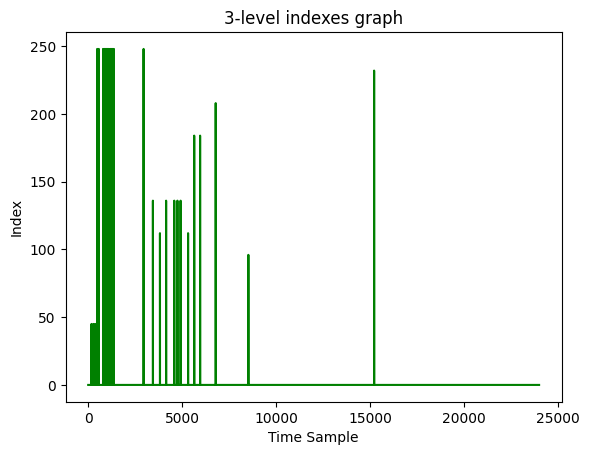

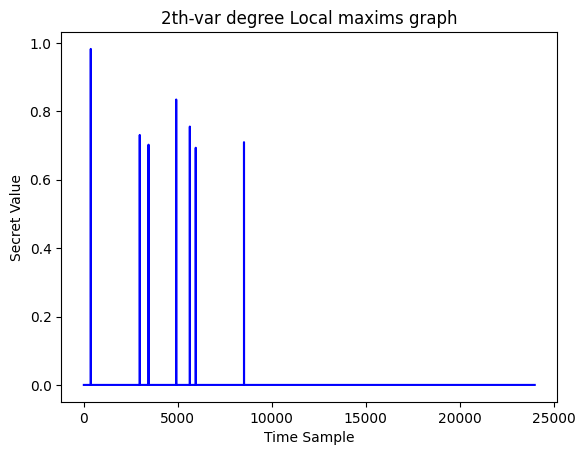

Number of uniques: 4
Number of local maxims: 7
Uniquess: [45, 184, 136, 96]
Local maxims: [45, 184, 136, 136, 184, 184, 96]


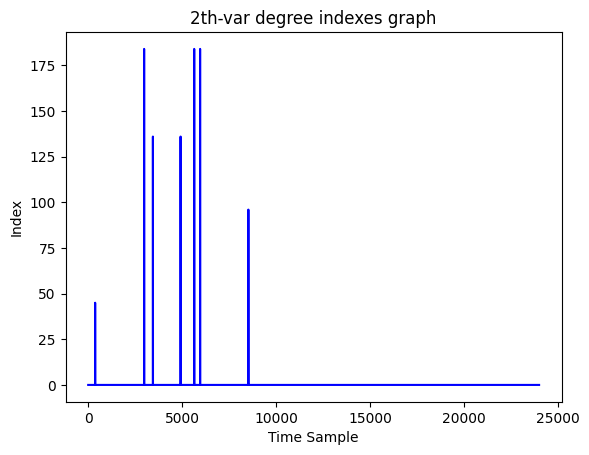

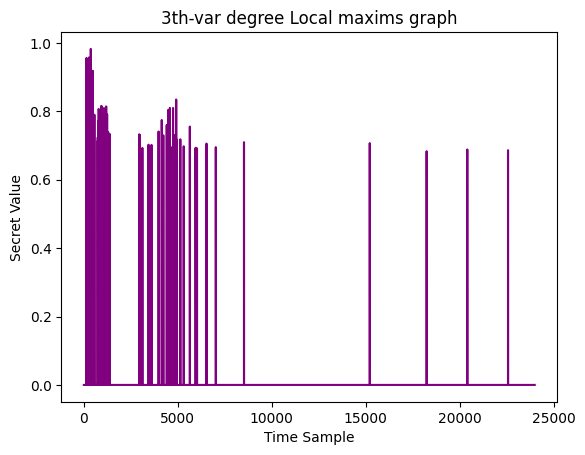

Number of uniques: 10
Number of local maxims: 116
Uniquess: [1, 45, 248, 240, 184, 136, 96, 112, 232, 104]
Local maxims: [1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 240, 248, 248, 248, 240, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 248, 184, 184, 136, 96, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 112, 112, 112, 184, 184, 96, 184, 184, 240, 96, 96, 232, 104, 104, 104]


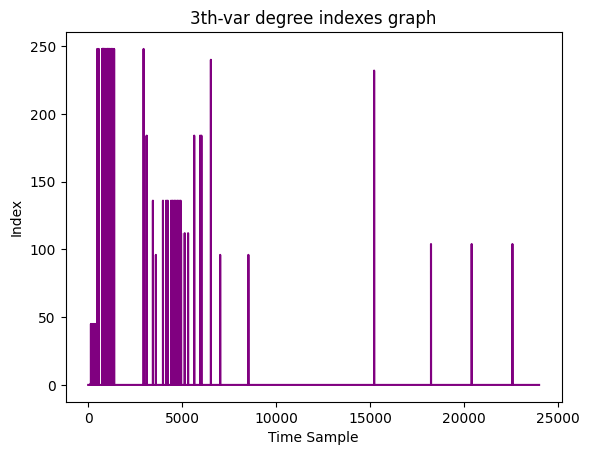

In range 0 - 24000
 Found the soonest secret value is 45, at the time sample 370, with correlation secret_corr = 0.983


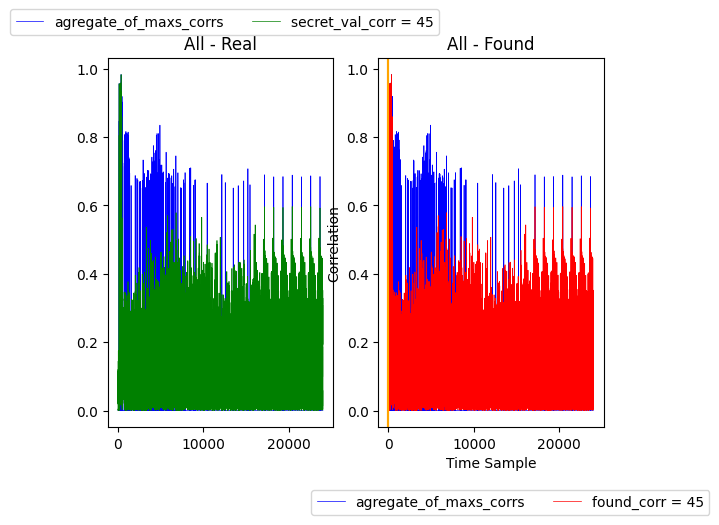

In range 1673 - 24000
 Found the soonest secret value is 184, at the time sample 2977, with correlation secret_corr = 0.731


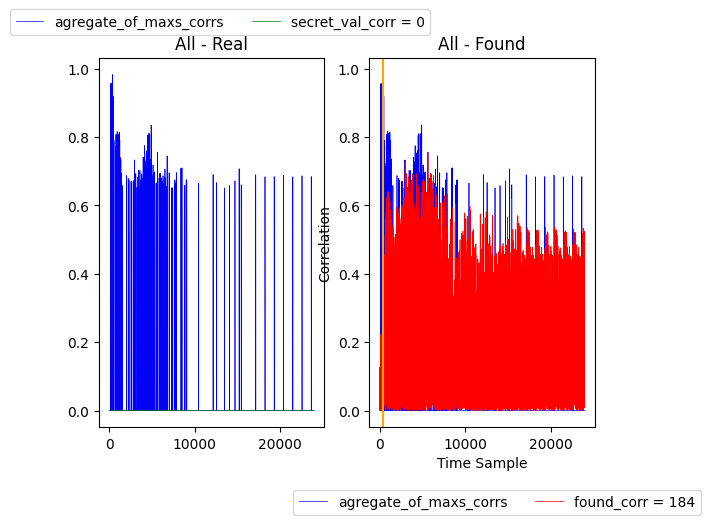

In range 3210 - 24000
 Found the soonest secret value is 136, at the time sample 3444, with correlation secret_corr = 0.703


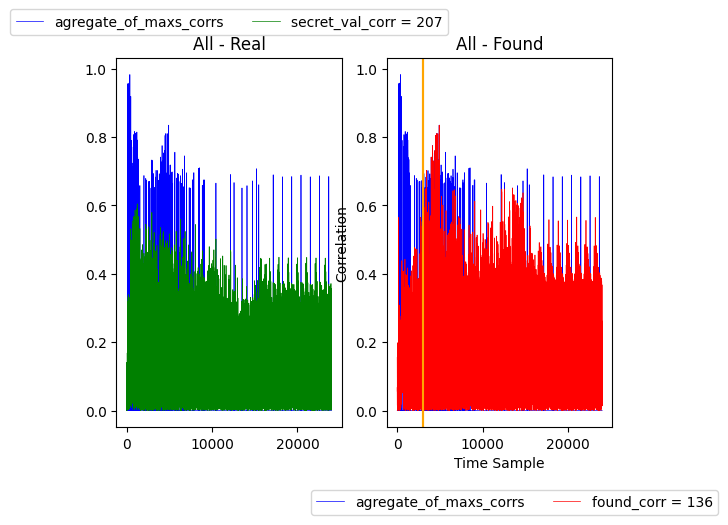

In range 4181 - 24000
 Found the soonest secret value is 136, at the time sample 4917, with correlation secret_corr = 0.835


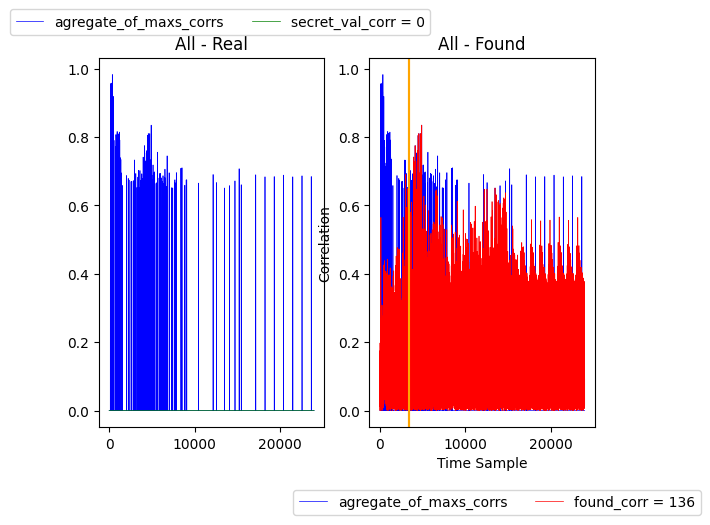

In range 5280 - 24000
 Found the soonest secret value is 184, at the time sample 5642, with correlation secret_corr = 0.756


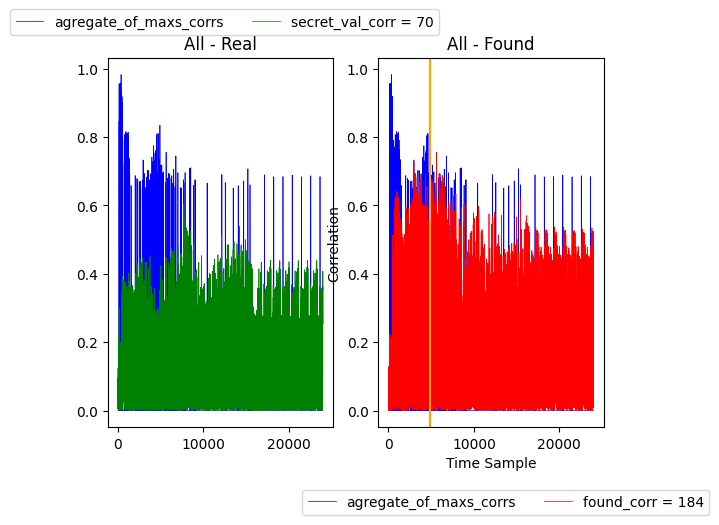

In [112]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0

    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     min_treshold = 0.65,
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 200,
                                                                                                                     level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(1.5, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(1.5, -0.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample

In [ ]:
#E:/DP_database/database
waves = np.load("E:/DP_database/database/waves__256TimeMult_Dec2-ntg2-10000.npy")
ncorr_all = np.load("E:/DP_database/database/corrs__256TimeMult_Dec2-ntg2-10000.npy")
secret_weight = np.load("E:/DP_database/database/weights__256TimeMult_Dec2-ntg2-10000.csv.npy")

1213
 Index of global max: 18354 and global_max_val: 0.9615334156297864


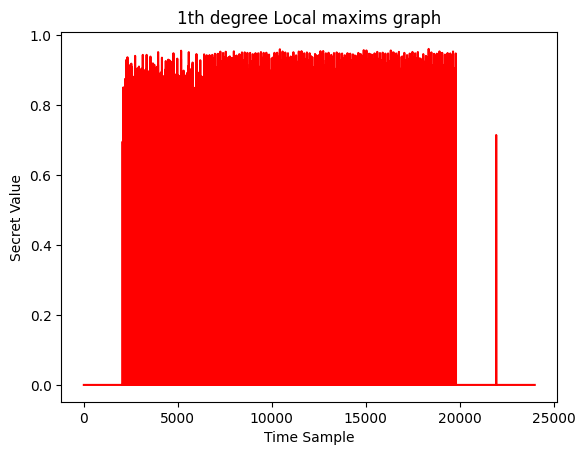

Number of uniques: 248
Number of local maxims: 1142
Uniquess: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,

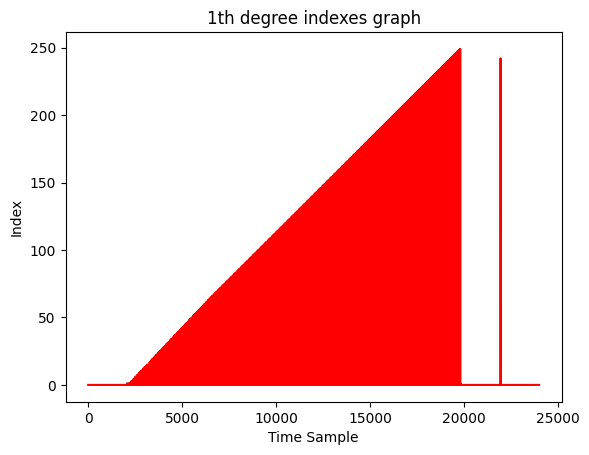

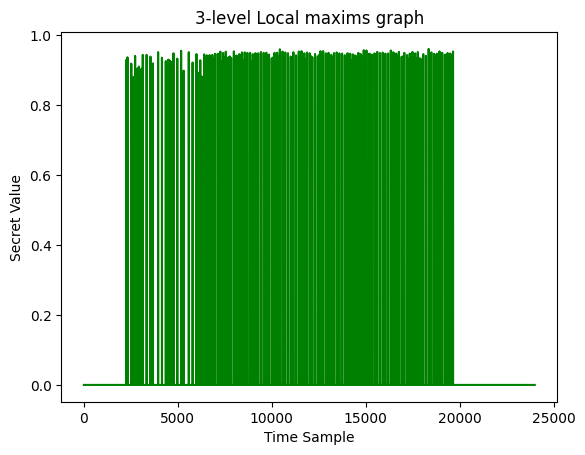

Number of uniques: 163
Number of local maxims: 164
Uniquess: [2, 3, 6, 8, 9, 11, 12, 14, 15, 18, 21, 23, 27, 30, 33, 35, 36, 1, 38, 39, 42, 45, 47, 51, 54, 57, 59, 60, 63, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 101, 103, 105, 107, 109, 110, 111, 113, 114, 115, 117, 118, 119, 121, 123, 125, 127, 129, 131, 133, 134, 135, 137, 138, 139, 141, 142, 143, 145, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165, 167, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 189, 190, 191, 193, 195, 197, 199, 201, 202, 203, 205, 206, 207, 209, 210, 211, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 225, 227, 229, 230, 231, 233, 234, 235, 237, 238, 239, 241, 242, 243, 245, 246, 247]
Local maxims: [2, 3, 6, 8, 9, 11, 12, 14, 15, 18, 21, 23, 27, 30, 33, 35, 36, 1, 38, 39, 42, 45, 47, 51, 54, 57, 59, 60, 1, 63, 65, 66, 67, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 82,

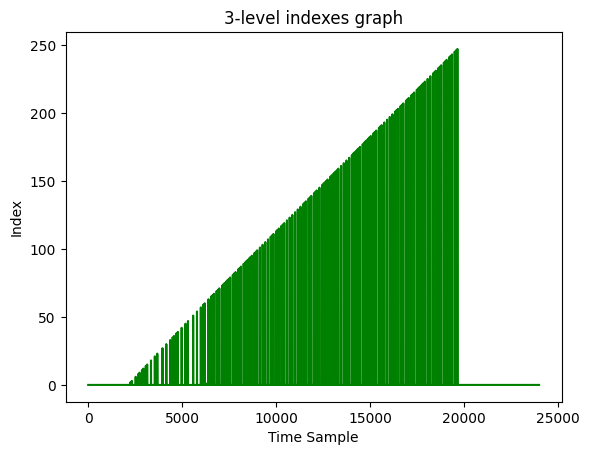

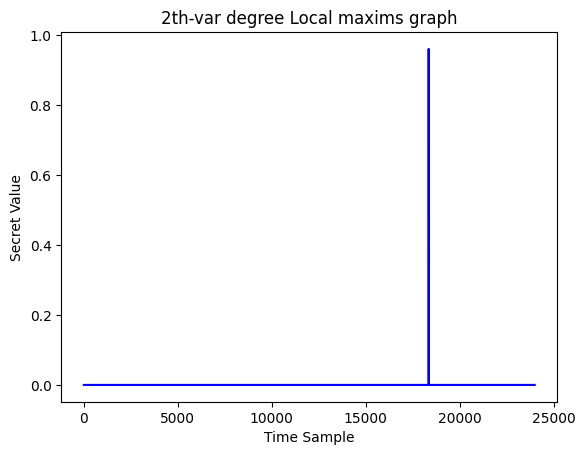

Number of uniques: 1
Number of local maxims: 1
Uniquess: [229]
Local maxims: [229]


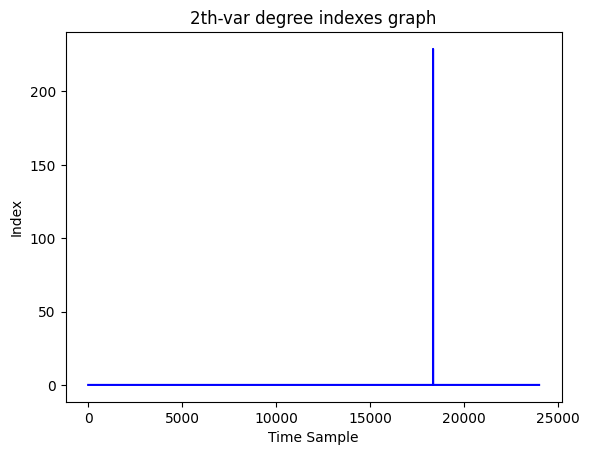

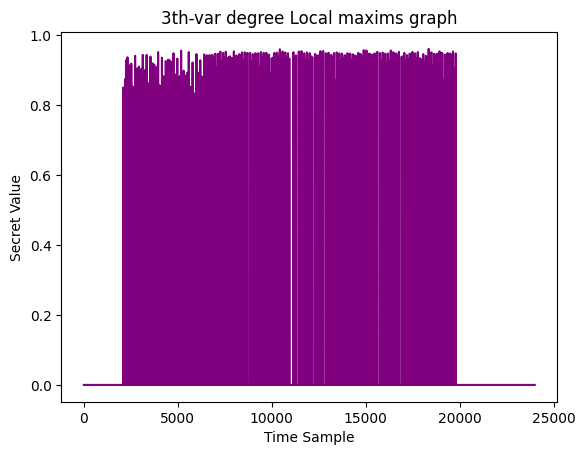

Number of uniques: 223
Number of local maxims: 256
Uniquess: [1, 2, 3, 5, 6, 7, 9, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 129, 130, 131, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 23

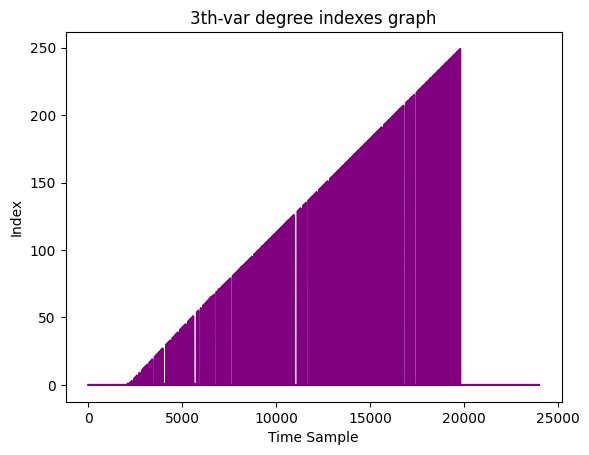

In range 0 - 24000
 Found the soonest secret value is 229, at the time sample 18354, with correlation secret_corr = 0.962


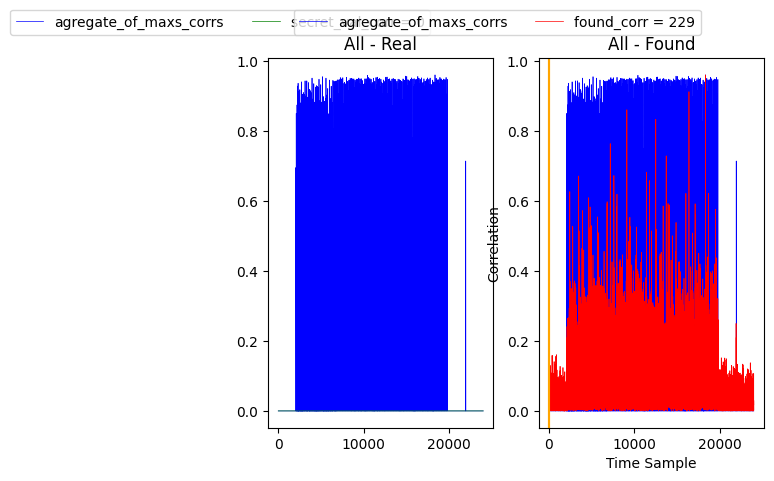

In range 0 - 24000
 Found the soonest secret value is 229, at the time sample 18354, with correlation secret_corr = 0.962


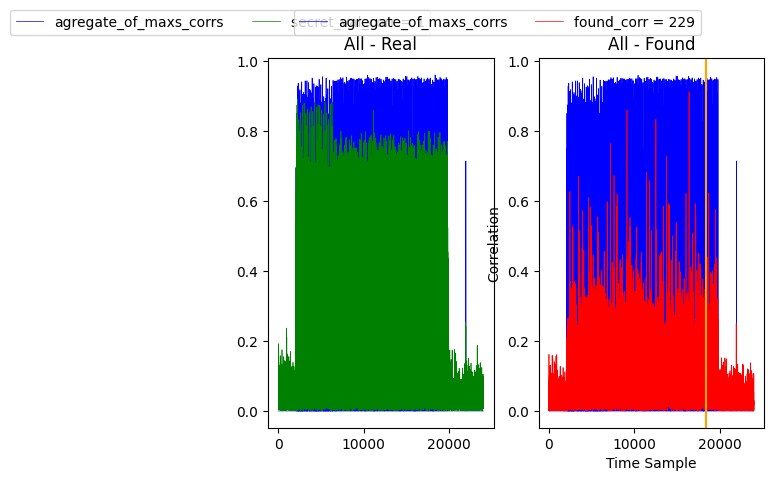

In range 0 - 24000
 Found the soonest secret value is 229, at the time sample 18354, with correlation secret_corr = 0.962


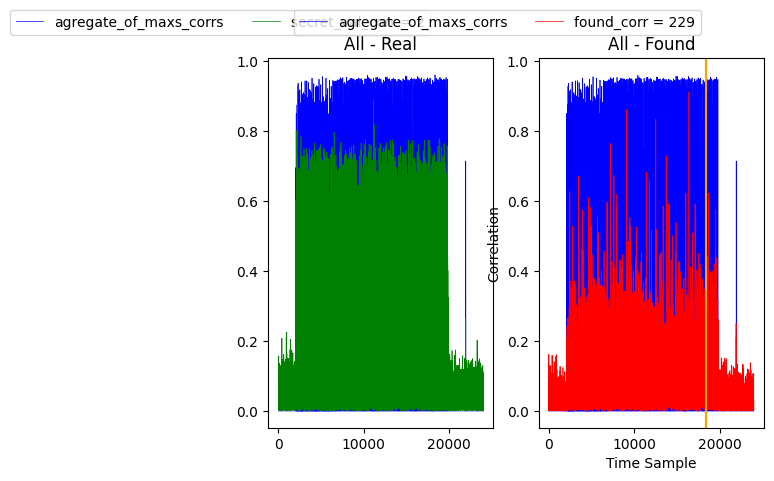

In range 0 - 24000
 Found the soonest secret value is 229, at the time sample 18354, with correlation secret_corr = 0.962


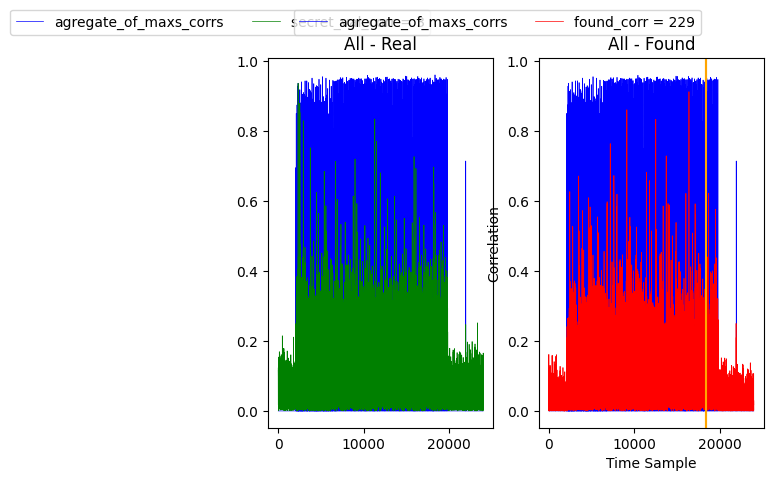

In range 0 - 24000
 Found the soonest secret value is 229, at the time sample 18354, with correlation secret_corr = 0.962


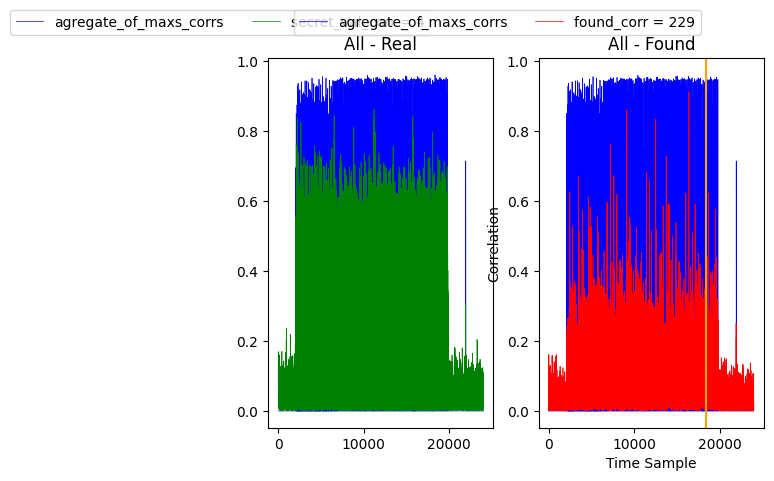

In [87]:
    #secret_weight = []
    index = 0
    #for i in out_data[0][3:out_data[0][2]+2]:
    #    secret_weight.append(i)
    stop_num = 5
    maxims_map = None
    last_found_indx = 0


    secret_weight = []
    for i in range(50):
        secret_weight.append(i)
    for secret in secret_weight:
        secret_value, time_sample, correlation, localMax_vector, colmn_maxVector, nextIndex, maxims_map = get_weight(np.array(ncorr_all),
                                                                                                                     min_treshold = 0.65,
                                                                                                                     peak_range = 0.3,
                                                                                                                     show_info=True,
                                                                                                                     lastIndex=index,
                                                                                                                     map_2dgrMaxs=maxims_map,
                                                                                                                     mountain_half_dist = 200,
                                                                                                                     level = 3)
        
        index = nextIndex
        figure, axis = plt.subplots(1, 2)
        # Comparison to real correlation
        axis[0].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[0].plot(ncorr_all[secret], color='g', label=f'secret_val_corr = {secret}', linewidth=0.5)
        #axis[0].legend(loc='upper right')
        axis[0].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[0].set_title("All - Real")
        plt.xlabel("Time Sample")
        plt.ylabel("Correlation")
        plt.axvline(x = last_found_indx, color = 'orange')
        
        # Comparison to found correlation
        axis[1].plot(colmn_maxVector, color='b', label='agregate_of_maxs_corrs', linewidth=0.5)
        axis[1].plot(ncorr_all[secret_value], color='r', label=f'found_corr = {secret_value}', linewidth=0.5)
        axis[1].legend(loc='upper right')
        axis[1].legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
        axis[1].set_title("All - Found")
        plt.axvline(x = last_found_indx, color = 'orange')

        #figure.savefig(f'{name}_correlation.png')

        stop_num -= 1
        if stop_num == 0:
            break
        plt.show()
        last_found_indx = time_sample